In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install imbalanced-learn

In [1]:
!pip install keras==2.15.0
!pip install tensorflow==2.15.0
!pip install torch==2.3.1+cu121 -f https://download.pytorch.org/whl/cu121/torch_stable.html

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.17.0 requires keras>=3.2.0, but you have keras 2.15.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Succ

In [ ]:
import pandas as pd
import numpy as np
# data = pd.read_csv('/kaggle/input/new-tip-smote/Dcomsmote.csv')
# data = data.iloc[:, :-1]
# Paths and data loading (adjust paths accordingly)
path1 = '/content/drive/MyDrive/Watashara_Projects/ACE (Peptide)/features/'
AAC = pd.read_csv(path1 + 'ACE_AAC.csv',header = None).iloc[:, 1:]
ASDC = pd.read_csv(path1 + 'ACE_ASDC.csv',header = None).iloc[:, 1:]
OPF_7bit_type_1 = pd.read_csv(path1 + 'opf_7bit_type_1_features.csv',header = None).iloc[1:, 1:]
OPF_7bit_type_2 = pd.read_csv(path1 + 'opf_7bit_type_2_features.csv',header = None).iloc[1:, 1:]
OPF_7bit_type_3 = pd.read_csv(path1 + 'opf_7bit_type_3_features.csv',header = None).iloc[1:, 1:]
OPF_10bit = pd.read_csv(path1 + 'opf_10bit_features.csv',header = None).iloc[1:, 1:]
esmv1 = pd.read_csv(path1 + 'esmv1_feat_ACE.csv',header = None).iloc[:, :]
esm2 = pd.read_csv(path1 + 'esm2_t6_8M_feat_ACE.csv',header = None).iloc[:, :]
prot_t5 = pd.read_csv(path1 + 'ACE_embeddings_prot_t5_xl_bfd.csv',header = None).iloc[1:, 1:]
BiLSTM_feat = pd.read_csv(path + 'features/BiLSTM.csv', header=None)
BiGRU_feat = pd.read_csv(path + 'features/BiGRU.csv', header=None)

# Concatenate all features into a single array
data = np.column_stack((AAC, ASDC, OPF_7bit_type_1, OPF_7bit_type_2, OPF_7bit_type_3, OPF_10bit, esmv1, esm2, prot_t5))
esm1_2_prot_t5 = np.column_stack(( esmv1, esm2, BiLSTM_feat,BiGRU_feat))

data_ = pd.DataFrame(data)
#R='R100'
data = data_
print(esm1_2_prot_t5.shape)
# print(X_test.shape)
# print(y.shape)

(1020, 2624)


(996, 325)
Epoch 1/60
195/199 [============================>.] - ETA: 0s - loss: 0.5656 - binary_accuracy: 0.7006
Epoch 1: val_loss improved from inf to 0.27433, saving model to /content/drive/MyDrive/Watashara_Projects/ACE/Update_results/GAN_wSMOTE/gGAN_fold_1.keras
199/199 [==============================] - 4s 8ms/step - loss: 0.5616 - binary_accuracy: 0.7023 - val_loss: 0.2743 - val_binary_accuracy: 0.9125 - lr: 0.0010
Epoch 2/60
198/199 [============================>.] - ETA: 0s - loss: 0.3765 - binary_accuracy: 0.8384
Epoch 2: val_loss improved from 0.27433 to 0.21063, saving model to /content/drive/MyDrive/Watashara_Projects/ACE/Update_results/GAN_wSMOTE/gGAN_fold_1.keras
199/199 [==============================] - 1s 5ms/step - loss: 0.3767 - binary_accuracy: 0.8379 - val_loss: 0.2106 - val_binary_accuracy: 0.9525 - lr: 0.0010
Epoch 3/60
195/199 [============================>.] - ETA: 0s - loss: 0.3742 - binary_accuracy: 0.8577
Epoch 3: val_loss did not improve from 0.21063
199/1

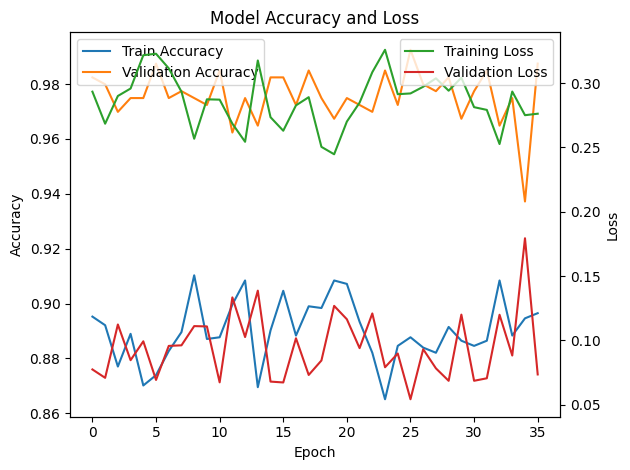

In [3]:
import os
import statistics
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import scale
from keras.layers import Input, Dense
from keras.layers import BatchNormalization, LeakyReLU, Dropout
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, roc_curve, auc, average_precision_score, precision_recall_curve, f1_score, accuracy_score
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import keras
from keras.layers import Conv1D, Flatten, Reshape
from sklearn.preprocessing import scale

#
# # Load data
# path = "/content/drive/MyDrive/Watashara_Projects/ACE (Peptide)/"
# data_ = pd.read_csv(path + 'EN_All_clean.csv',header = None)

# data_np = np.array(data_)
# data = scale(data_np[:, :])


# label1=np.ones((394,1))#Value can be changed
# label2=np.zeros((626,1))
# labels=np.append(label1,label2)


# # y = labels


# X_train, X_ind, y_train, y_ind = train_test_split(data, labels, test_size=0.2, random_state=42)

# print(X_train.shape)
# print(X_ind.shape)
# print(y_train.shape)
# print(y_ind.shape)

# # X = np.array(X_train,dtype=float)
# # y = y_train

# from imblearn.over_sampling import SMOTE, BorderlineSMOTE
# oversample = SMOTE()
# X_train, y_train = oversample.fit_resample(X_train, y_train)

path = "/content/drive/MyDrive/Watashara_Projects/ACE/"
train_data = pd.read_csv(path + 'selected_features_allfeat/XtrainData_wSMOTE.csv')


X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values

print(np.shape(X_train))

X = np.array(X_train,dtype=float)
y = y_train

[sample_num, input_dimwx] = np.shape(X)
out_dim = 2

optimizer = Adam(beta_1=0.5) #learning_rate=0.001,

# Discriminator
D = Sequential()
D.add(Dense(64, input_dim=input_dimwx))
D.add(LeakyReLU(alpha=0.2))
D.add(Dropout(0.2))
D.add(Dense(32))
D.add(LeakyReLU(alpha=0.2))
D.add(Dense(out_dim, activation='sigmoid'))
img = Input(shape=(input_dimwx,))
validity = D(img)
Discriminator = Model(img, validity)
Discriminator.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['binary_accuracy'])

# Generator
G = Sequential()
G.add(Dense(64, input_dim=input_dimwx))
G.add(LeakyReLU(alpha=0.2))
G.add(BatchNormalization(momentum=0.8))
G.add(Dense(64))
G.add(LeakyReLU(alpha=0.2))
G.add(BatchNormalization(momentum=0.8))
G.add(Dense(32))
G.add(LeakyReLU(alpha=0.2))
G.add(BatchNormalization(momentum=0.8))
G.add(Dense(input_dimwx, activation='sigmoid'))
noise = Input(shape=(input_dimwx,))
G_img = G(noise)
Generator = Model(noise, G_img)

z = Input(shape=(input_dimwx,))
G_img = Generator(z)
Discriminator.trainable = False
validity = Discriminator(G_img)
GAN = Model(z, validity)
GAN.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['binary_accuracy'])

# Initialize metric collections
accuracy_collecton = []
BACC_collecton = []
Sn_collecton = []
Sp_collecton = []
MCC_collecton = []
AUC_collecton = []
F1_collecton = []
AP = []

mean_recall = np.linspace(0, 1, 100)
all_precision = []
base_fpr = np.linspace(0, 1, 100)
mean_tpr = 0.0

interp_tpr_collection = []
y_scores_all_folds = []
y_valid_all_folds = []

def categorical_probas_to_classes(p):
    return np.argmax(p, axis=1)

def to_categorical(y, nb_classes=None):
    y = np.array(y, dtype='int')
    if not nb_classes:
        nb_classes = np.max(y) + 1
    Y = np.zeros((len(y), nb_classes))
    for i in range(len(y)):
        Y[i, y[i]] = 1
    return Y

outpath =  "/content/drive/MyDrive/Watashara_Projects/ACE/"
folder_name = "Update_results/GAN_wSMOTE"

skf = StratifiedKFold(n_splits=5, shuffle=True)

fold_num = 1
for train, test in skf.split(X, y):
    X_train, X_valid = np.take(X, train.tolist(), axis=0), np.take(X, test.tolist(), axis=0)
    y_train, y_valid = np.take(y, train.tolist(), axis=0), np.take(y, test.tolist(), axis=0)

    y_train = to_categorical(y_train)

    clf = GAN
    reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
    # Define callbacks
    model_path = outpath + f'{folder_name}/gGAN_fold_{fold_num}.keras'
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min'),
        ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, verbose=1), reduce_lr]

    hist = clf.fit(X_train, y_train, batch_size=4, epochs=60, validation_data=(X_valid, to_categorical(y_valid)), callbacks=callbacks)

    # Load the best model
    clf.load_weights(model_path)

    y_score = clf.predict(X_valid)
    y_class = categorical_probas_to_classes(y_score)

    # Collect y_scores and y_valid for saving
    y_scores_all_folds.append(y_score)
    y_valid_all_folds.append(y_valid)

    TP, FP, FN, TN = confusion_matrix(y_valid, y_class).ravel()
    Sn_collecton.append(TP / (TP + FN))
    Sp_collecton.append(TN / (TN + FP))
    MCC = (TP * TN - FP * FN) / math.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
    MCC_collecton.append(MCC)
    BACC_collecton.append(0.5 * TP / (TP + FN) + 0.5 * TN / (TN + FP))

    # Calculate Accuracy
    accuracy = accuracy_score(y_valid, y_class)
    accuracy_collecton.append(accuracy)
    # Calculate F1-score
    f1 = f1_score(y_valid, y_class)
    F1_collecton.append(f1)

    fpr, tpr, _ = roc_curve(y_valid, y_score[:, 1])
    interp_tpr = np.interp(base_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    interp_tpr_collection.append(interp_tpr)
    auc_roc = auc(fpr, tpr)
    AUC_collecton.append(auc_roc)

    precision, recall, _ = precision_recall_curve(y_valid, y_score[:, 1])
    average_precision = average_precision_score(y_valid, y_score[:, 1])
    recall = np.flipud(recall)
    precision = np.flipud(precision)
    mean_precision = np.interp(mean_recall, recall, precision)
    all_precision.append(mean_precision)
    AP.append(average_precision)

    fold_num += 1

print(f"Accuracy: {round(statistics.mean(accuracy_collecton), 3)} ± {round(statistics.stdev(accuracy_collecton), 3)}")
print(f"BACC: {round(statistics.mean(BACC_collecton), 3)} ± {round(statistics.stdev(BACC_collecton), 3)}")
print(f"Sn: {round(statistics.mean(Sn_collecton), 3)} ± {round(statistics.stdev(Sn_collecton), 3)}")
print(f"Sp: {round(statistics.mean(Sp_collecton), 3)} ± {round(statistics.stdev(Sp_collecton), 3)}")
print(f"MCC: {round(statistics.mean(MCC_collecton), 3)} ± {round(statistics.stdev(MCC_collecton), 3)}")
print(f"F1: {round(statistics.mean(F1_collecton), 3)} ± {round(statistics.stdev(F1_collecton), 3)}")
print(f"AUC: {round(statistics.mean(AUC_collecton), 3)} ± {round(statistics.stdev(AUC_collecton), 3)}")
print(f"AP: {round(statistics.mean(AP), 3)} ± {round(statistics.stdev(AP), 3)}")

mean_tpr = np.mean(interp_tpr_collection, axis=0)
mean_tpr[-1] = 1.0

mean_precision = np.mean(all_precision, axis=0)

# np.savez(outpath + f'{folder_name}/GAN_PCA_All_cross_vaild.npz', fpr=base_fpr, tpr=mean_tpr, roc_auc=AUC_collecton)
# np.savez(outpath + f'{folder_name}/gGAN_PCA_All_cross_vaild.npz', recall=mean_recall, precision=mean_precision, average_precision=AP)

# Save y_score and y_valid for each fold as CSV
y_scores_df = pd.DataFrame(np.concatenate(y_scores_all_folds, axis=0))
y_scores_df.to_csv(outpath + f'{folder_name}/y_scores_all_folds.csv', index=False)

y_valid_df = pd.DataFrame(np.concatenate(y_valid_all_folds, axis=0))
y_valid_df.to_csv(outpath + f'{folder_name}/y_valid_all_folds.csv', index=False)

# Plot accuracy and loss on separate y-axes
fig, ax1 = plt.subplots()

# Plot accuracy on the primary y-axis
ax1.plot(hist.history['binary_accuracy'], label='Train Accuracy', color='tab:blue')
ax1.plot(hist.history['val_binary_accuracy'], label='Validation Accuracy', color='tab:orange')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# Create a secondary y-axis to plot loss
ax2 = ax1.twinx()
ax2.plot(hist.history['loss'], label='Training Loss', color='tab:green')
ax2.plot(hist.history['val_loss'], label='Validation Loss', color='tab:red')
ax2.set_ylabel('Loss')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

plt.title('Model Accuracy and Loss')
fig.tight_layout()
plt.show()


In [4]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

import math

# Define utility functions
def categorical_probas_to_classes(p):
    return np.argmax(p, axis=1)

def calculate_performance(test_num, pred_y, labels):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for index in range(test_num):
        if labels[index] == 1:
            if labels[index] == pred_y[index]:
                tp += 1
            else:
                fn += 1
        else:
            if labels[index] == pred_y[index]:
                tn += 1
            else:
                fp += 1

    acc = float(tp + tn) / test_num
    precision = float(tp) / (tp + fp + 1e-06)
    npv = float(tn) / (tn + fn + 1e-06)
    sensitivity = float(tp) / (tp + fn + 1e-06)
    specificity = float(tn) / (tn + fp + 1e-06)
    mcc = float(tp * tn - fp * fn) / (math.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) + 1e-06)
    f1 = float(tp * 2) / (tp * 2 + fp + fn + 1e-06)
    return acc, precision, npv, sensitivity, specificity, mcc, f1

path = "/content/drive/MyDrive/Watashara_Projects/ACE/"

fldr_name = "Update_results/GAN_wSMOTE"



test_feat = pd.read_csv(path + 'selected_features_allfeat/XtestData.csv')


X_test = test_feat.iloc[:, :-1].values
labels = test_feat.iloc[:, -1].values

# # Load independent data
Xt = X_test
yt = labels

print(np.shape(test_feat))
# Load independent data
# Xt = X_ind
# yt = y_ind
# print(np.shape(yt))

# Reshape for Conv1D layer
# [sample_num, input_dim] = np.shape(Xt)
# Xt = np.reshape(Xt, (-1, 1, input_dim))

# Prepare lists to store results
sepscores = []
ytest = np.ones((1, 2)) * 0.5
yscore = np.ones((1, 2)) * 0.5

# Load and evaluate models
for i in range(5):
    i = i +1
    # Load model
    # Load the best model
    # best_model_path = path + f"{fldr_path}/best_model.keras"
    # clf = load_model(best_model_path)
    # loaded_model = load_model(path + f"Results/{fldr_name}/fold_{i}_model.keras")

    # loaded_model = load_model(path + f"Update_results/{fldr_name}/DCGAN_fold_{i}.keras")

    loaded_model = load_model(path + f"{fldr_name}/gGAN_fold_{i}.keras")
    # fold_1_model


    # Make predictions
    y_score = loaded_model.predict(Xt)
    y_class = categorical_probas_to_classes(y_score)

    # Prepare data for performance calculation
    y_test = to_categorical(yt)
    print(f"Shape of y_test: {y_test.shape}")
    ytest = np.vstack((ytest, y_test))
    ytest_tmp = yt
    yscore = np.vstack((yscore, y_score))

    # Calculate AUPR
    precision_pr, recall_pr, _ = precision_recall_curve(y_test[:, 1], y_score[:, 1])
    aupr = average_precision_score(y_test[:, 1], y_score[:, 1])


    # Calculate performance metrics
    acc, precision, npv, sensitivity, specificity, mcc, f1 = calculate_performance(len(y_class), y_class, ytest_tmp)
    fpr, tpr, _ = roc_curve(y_test[:, 1], y_score[:, 1])
    roc_auc = auc(fpr, tpr)
    sepscores.append([acc, precision, npv, sensitivity, specificity, mcc, f1, roc_auc, aupr])
    print(f'GAN: acc={acc:.6f}, precision={precision:.6f}, npv={npv:.6f}, sensitivity={sensitivity:.6f}, specificity={specificity:.6f}, mcc={mcc:.6f}, f1={f1:.6f}, roc_auc={roc_auc:.6f}, aupr={aupr:.6f}')

# Save performance results
scores = np.array(sepscores)
result1 = np.mean(scores, axis=0)
H1 = result1.tolist()
sepscores.append(H1)
result = sepscores

data_csv = pd.DataFrame(data=result, columns=['acc', 'precision', 'npv', 'sensitivity', 'specificity', 'mcc', 'f1', 'roc_auc','aupr'])
data_csv.to_csv(path + f'{fldr_name}/test_results.csv', index=False)

# Save ytest and yscore to CSV files
ytest_df = pd.DataFrame(ytest, columns=['Class_0', 'Class_1'])
yscore_df = pd.DataFrame(yscore, columns=['Score_0', 'Score_1'])

ytest_df.to_csv(path + f'{fldr_name}/ytest.csv', index=False)
yscore_df.to_csv(path + f'{fldr_name}/yscore.csv', index=False)




(204, 326)
7/7 [==============================] - 0s 3ms/step
Shape of y_test: (204, 2)
GAN: acc=0.911765, precision=0.902778, npv=0.916667, sensitivity=0.855263, specificity=0.945312, mcc=0.809955, f1=0.878378, roc_auc=0.956826, aupr=0.945398
7/7 [==============================] - 0s 3ms/step
Shape of y_test: (204, 2)
GAN: acc=0.906863, precision=0.913043, npv=0.903704, sensitivity=0.828947, specificity=0.953125, mcc=0.799222, f1=0.868966, roc_auc=0.951480, aupr=0.937971
7/7 [==============================] - 0s 3ms/step
Shape of y_test: (204, 2)
GAN: acc=0.906863, precision=0.880000, npv=0.922481, sensitivity=0.868421, specificity=0.929687, mcc=0.800292, f1=0.874172, roc_auc=0.959293, aupr=0.944857
7/7 [==============================] - 0s 3ms/step
Shape of y_test: (204, 2)
GAN: acc=0.897059, precision=0.936508, npv=0.879433, sensitivity=0.776316, specificity=0.968750, mcc=0.779698, f1=0.848921, roc_auc=0.952817, aupr=0.944881
7/7 [==============================] - 0s 5ms/step
Shape 

7/7 [==============================] - 0s 7ms/step
Model 1:
Accuracy: 0.951
BACC: 0.95
Sn: 0.954
Sp: 0.946
MCC: 0.895
AUC: 0.992
AP: 0.987
F1: 0.933



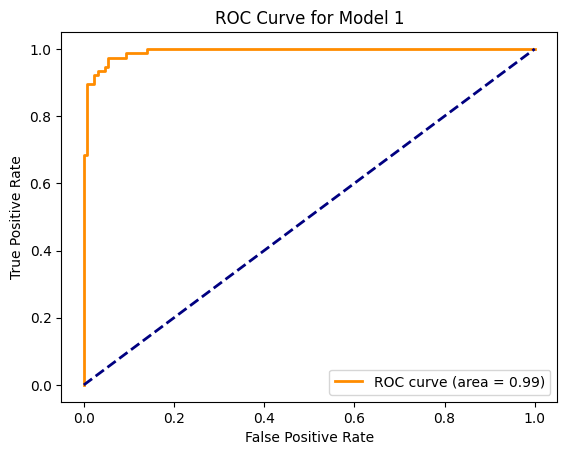

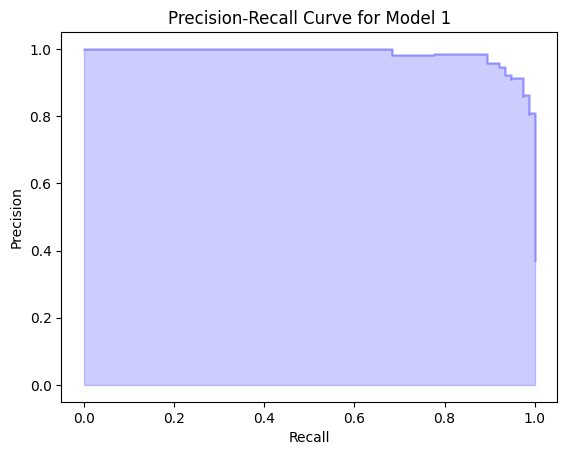

7/7 [==============================] - 0s 5ms/step
Model 2:
Accuracy: 0.956
BACC: 0.948
Sn: 0.992
Sp: 0.904
MCC: 0.91
AUC: 0.993
AP: 0.984
F1: 0.943



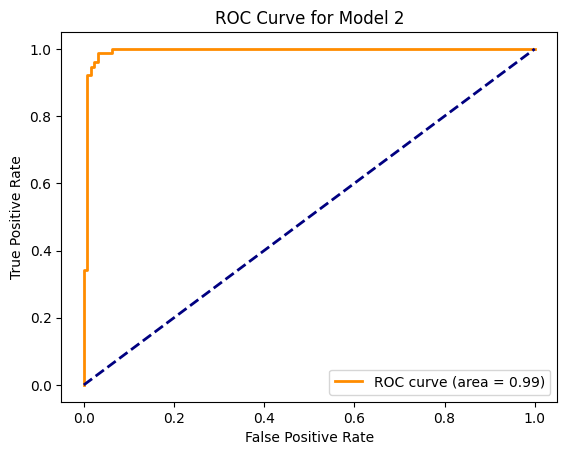

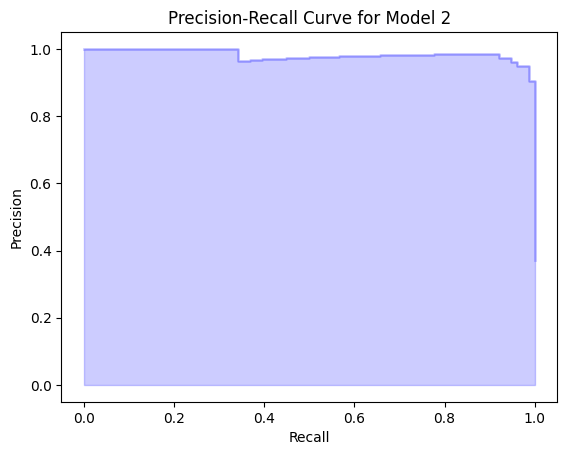

7/7 [==============================] - 0s 5ms/step
Model 3:
Accuracy: 0.961
BACC: 0.958
Sn: 0.969
Sp: 0.947
MCC: 0.916
AUC: 0.993
AP: 0.984
F1: 0.947



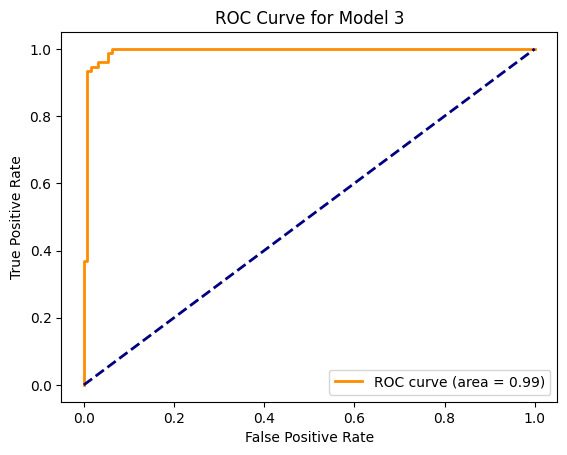

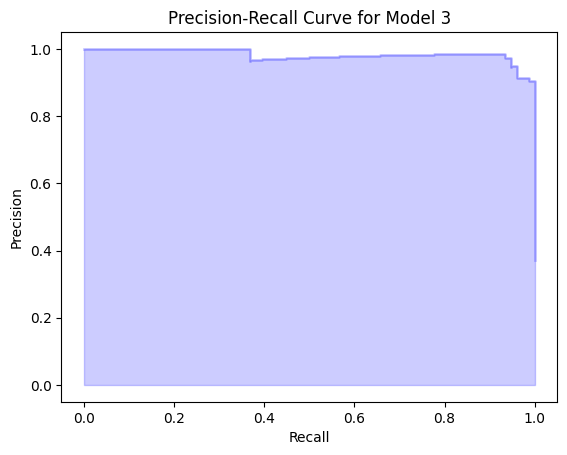

7/7 [==============================] - 0s 4ms/step
Model 4:
Accuracy: 0.946
BACC: 0.943
Sn: 0.953
Sp: 0.933
MCC: 0.884
AUC: 0.992
AP: 0.986
F1: 0.927



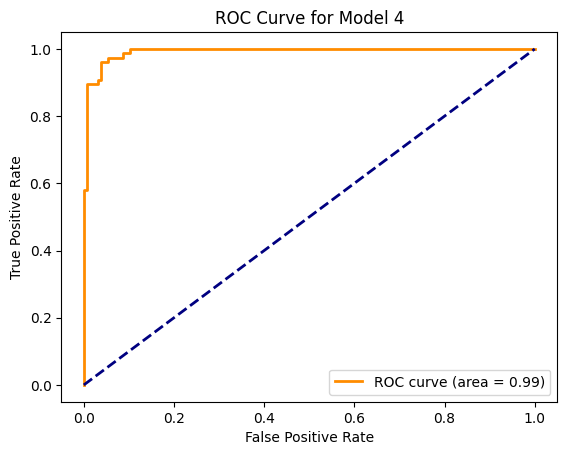

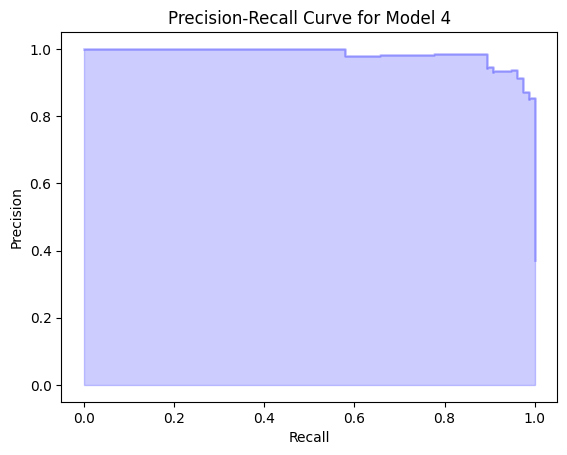

7/7 [==============================] - 0s 6ms/step
Model 5:
Accuracy: 0.951
BACC: 0.96
Sn: 0.934
Sp: 0.985
MCC: 0.896
AUC: 0.992
AP: 0.987
F1: 0.931



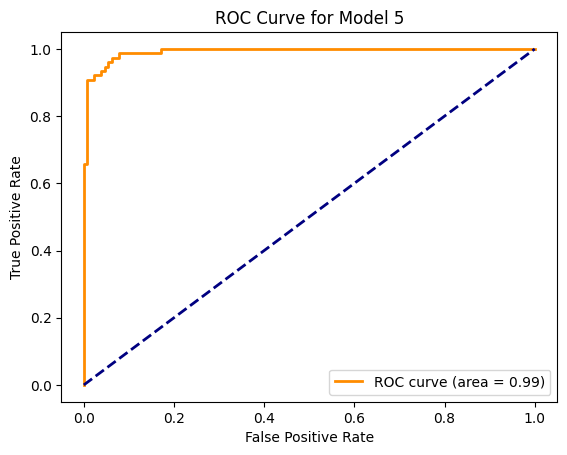

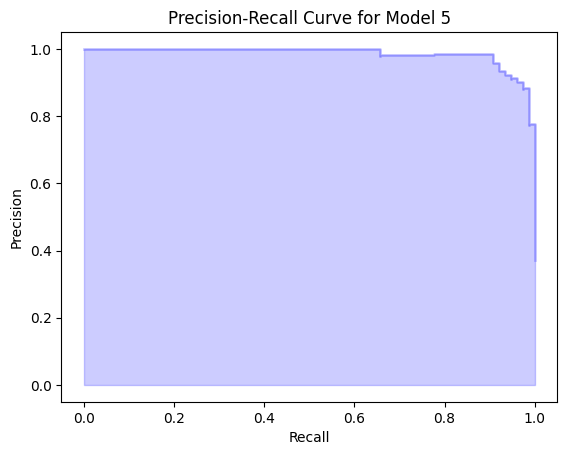

7/7 [==============================] - 0s 3ms/step
Model 6:
Accuracy: 0.971
BACC: 0.971
Sn: 0.969
Sp: 0.973
MCC: 0.937
AUC: 0.995
AP: 0.99
F1: 0.96



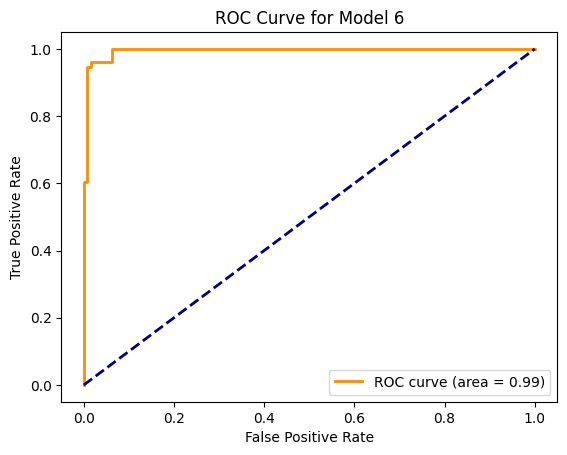

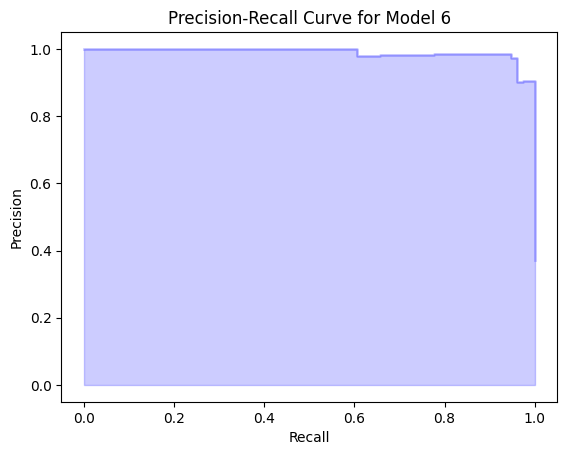

7/7 [==============================] - 0s 5ms/step
Model 7:
Accuracy: 0.946
BACC: 0.946
Sn: 0.947
Sp: 0.945
MCC: 0.884
AUC: 0.991
AP: 0.986
F1: 0.926



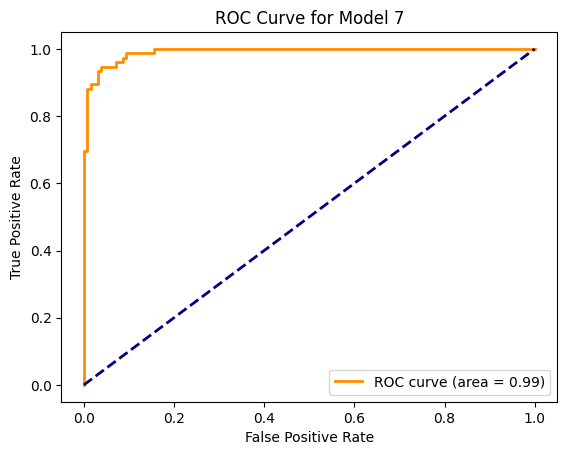

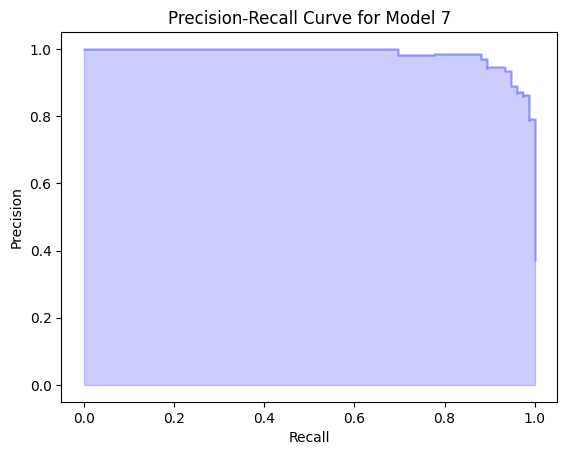

7/7 [==============================] - 0s 4ms/step
Model 8:
Accuracy: 0.961
BACC: 0.954
Sn: 0.984
Sp: 0.925
MCC: 0.918
AUC: 0.993
AP: 0.985
F1: 0.949



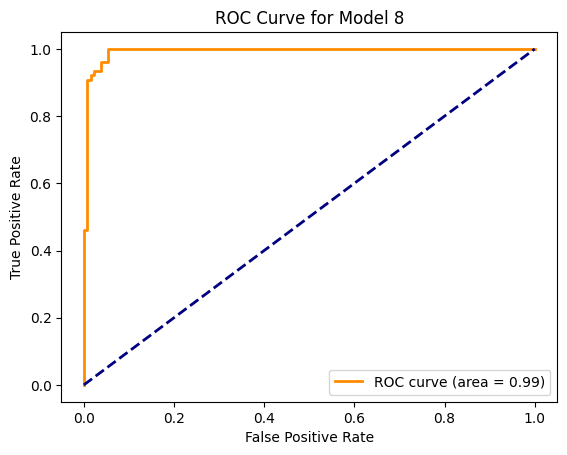

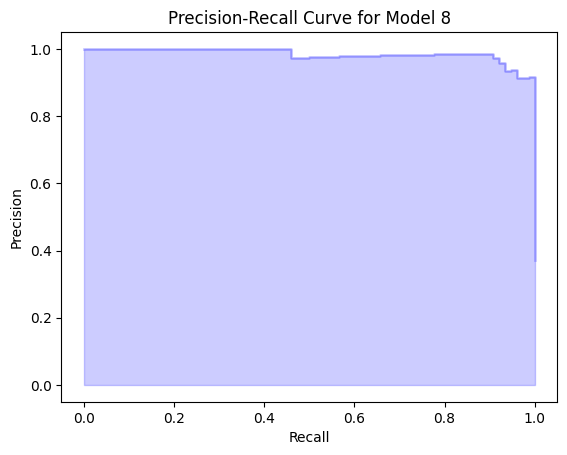

7/7 [==============================] - 0s 4ms/step
Model 9:
Accuracy: 0.966
BACC: 0.967
Sn: 0.962
Sp: 0.973
MCC: 0.926
AUC: 0.995
AP: 0.99
F1: 0.953



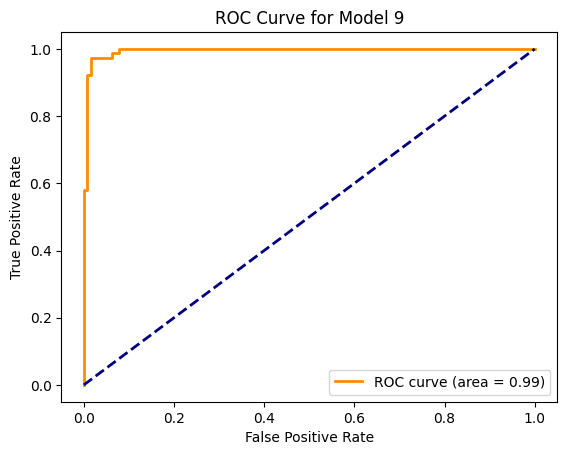

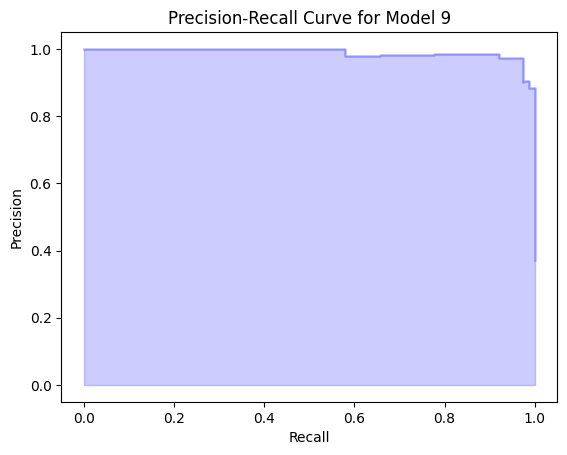

7/7 [==============================] - 0s 3ms/step
Model 10:
Accuracy: 0.961
BACC: 0.954
Sn: 0.984
Sp: 0.925
MCC: 0.918
AUC: 0.995
AP: 0.991
F1: 0.949



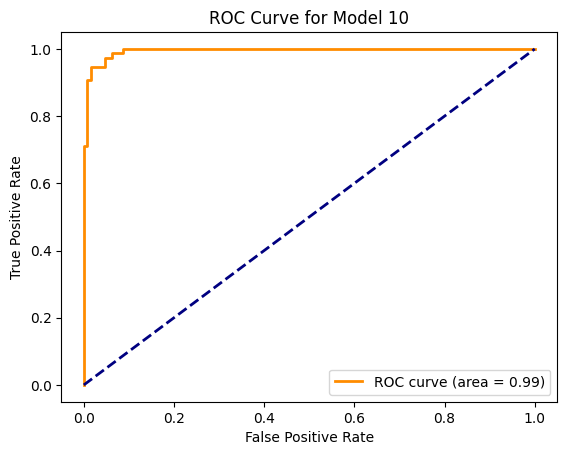

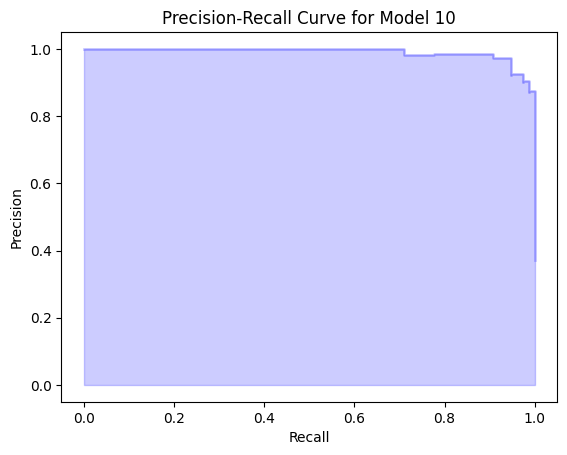

Average Accuracy: 0.957 ± 0.008
Average BACC: 0.955 ± 0.009
Average Sn: 0.965 ± 0.017
Average Sp: 0.946 ± 0.024
Average MCC: 0.908 ± 0.017
Average AUC: 0.993 ± 0.001
Average AP: 0.987 ± 0.002
Average F1: 0.942 ± 0.011


In [ ]:
from keras.models import load_model
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix, roc_curve, auc, average_precision_score, precision_recall_curve, f1_score, accuracy_score
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

path = "/content/drive/MyDrive/Watashara_Projects/ACE (Peptide)/"
# data_ = pd.read_csv(path + 'Dts_AEDN1000.csv')
# data = data_.iloc[:, :-1].values
# labels = data_.iloc[:, -1].values
# y = labels
# Xt = scale(data)
# yt = labels

Xt = X_ind
yt = y_ind
# Initialize lists to store metrics for each model
accuracies = []
BACCs = []
Sns = []
Sps = []
MCCs = []
AUCs = []
APs = []
F1s = []

# Iterate through each model and evaluate
for fold_num in range(1,11):  # Assuming models are saved as GAN_fold_1.h5, GAN_fold_2.h5, ..., GAN_fold_10.h5
    model_path = path + f'{folder_name}/gGAN_fold_{fold_num}.keras'
    clf = load_model(model_path)

    # Predict the labels for the independent dataset
    y_score = clf.predict(Xt)
    y_class = np.argmax(y_score, axis=1)

    # Calculate metrics
    accuracy = accuracy_score(yt, y_class)
    accuracies.append(accuracy)

    TP, FP, FN, TN = confusion_matrix(yt, y_class).ravel()
    Sn = TP / (TP + FN)
    Sns.append(Sn)
    Sp = TN / (TN + FP)
    Sps.append(Sp)
    MCC = (TP * TN - FP * FN) / math.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
    MCCs.append(MCC)
    BACC = 0.5 * Sn + 0.5 * Sp
    BACCs.append(BACC)

    fpr, tpr, _ = roc_curve(yt, y_score[:, 1])
    auc_roc = auc(fpr, tpr)
    AUCs.append(auc_roc)

    precision, recall, _ = precision_recall_curve(yt, y_score[:, 1])
    average_precision = average_precision_score(yt, y_score[:, 1])
    APs.append(average_precision)

    f1 = f1_score(yt, y_class)
    F1s.append(f1)

    # Print the results for each model
    print(f"Model {fold_num}:")
    print(f"Accuracy: {round(accuracy, 3)}")
    print(f"BACC: {round(BACC, 3)}")
    print(f"Sn: {round(Sn, 3)}")
    print(f"Sp: {round(Sp, 3)}")
    print(f"MCC: {round(MCC, 3)}")
    print(f"AUC: {round(auc_roc, 3)}")
    print(f"AP: {round(average_precision, 3)}")
    print(f"F1: {round(f1, 3)}")
    print()

    # Plot ROC curve for each model
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc_roc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Model {fold_num}')
    plt.legend(loc="lower right")
    plt.show()

    # Plot Precision-Recall curve for each model
    plt.figure()
    plt.step(recall, precision, where='post', color='b', alpha=0.2, lw=lw)
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for Model {fold_num}')
    plt.show()

# Print average and standard deviation of metrics across all models
print(f"Average Accuracy: {round(np.mean(accuracies), 3)} ± {round(np.std(accuracies), 3)}")
print(f"Average BACC: {round(np.mean(BACCs), 3)} ± {round(np.std(BACCs), 3)}")
print(f"Average Sn: {round(np.mean(Sns), 3)} ± {round(np.std(Sns), 3)}")
print(f"Average Sp: {round(np.mean(Sps), 3)} ± {round(np.std(Sps), 3)}")
print(f"Average MCC: {round(np.mean(MCCs), 3)} ± {round(np.std(MCCs), 3)}")
print(f"Average AUC: {round(np.mean(AUCs), 3)} ± {round(np.std(AUCs), 3)}")
print(f"Average AP: {round(np.mean(APs), 3)} ± {round(np.std(APs), 3)}")
print(f"Average F1: {round(np.mean(F1s), 3)} ± {round(np.std(F1s), 3)}")


In [ ]:
from keras.layers import Conv1D, Flatten, Reshape
# Load data
path = "/content/drive/MyDrive/Watashara_Projects/ACE (Peptide)/"
data_ = pd.read_csv(path + 'Text_features/bow_word2vec_features_ACE.csv')
esm2 = pd.read_csv(path + 'features/esm2_t6_8M_feat_ACE.csv',header = None).iloc[:, :]
esm1_2_w2vec = np.column_stack((data_,esm2))
data_np = np.array(esm1_2_w2vec)
data = scale(data_np[:, 1:])

label1=np.ones((394,1))#Value can be changed
label2=np.zeros((626,1))
labels=np.append(label1,label2)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

X = np.array(X_train, dtype=float)
y = y_train

[sample_num, input_dimwx] = np.shape(X)
out_dim = 2

optimizer = Adam(learning_rate=0.001, beta_1=0.5)

# Reshape input for Conv1D layer (e.g., (samples, steps, features))
input_shape = (input_dimwx, 1)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Discriminator
D = Sequential()
D.add(Conv1D(32, kernel_size=3, strides=2, input_shape=input_shape, padding='same'))
D.add(LeakyReLU(alpha=0.2))
D.add(Dropout(0.2))
D.add(Conv1D(64, kernel_size=3, strides=2, padding='same'))
D.add(LeakyReLU(alpha=0.2))
D.add(Dropout(0.2))
D.add(Flatten())
D.add(Dense(32))
D.add(LeakyReLU(alpha=0.2))
D.add(Dense(out_dim, activation='sigmoid'))
img = Input(shape=input_shape)
validity = D(img)
Discriminator = Model(img, validity)
Discriminator.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['binary_accuracy'])

# Generator
G = Sequential()
G.add(Dense(128, input_dim=input_dimwx))
G.add(LeakyReLU(alpha=0.2))
G.add(BatchNormalization(momentum=0.8))
G.add(Dense(input_dimwx))
G.add(LeakyReLU(alpha=0.2))
G.add(BatchNormalization(momentum=0.8))
G.add(Reshape((input_dimwx, 1)))
G.add(Conv1D(32, kernel_size=3, padding='same'))
G.add(LeakyReLU(alpha=0.2))
G.add(BatchNormalization(momentum=0.8))
G.add(Conv1D(1, kernel_size=3, padding='same'))
G.add(Flatten())
G.add(Dense(input_dimwx, activation='sigmoid'))
noise = Input(shape=(input_dimwx,))
G_img = G(noise)
Generator = Model(noise, G_img)

z = Input(shape=(input_dimwx,))
G_img = Generator(z)
Discriminator.trainable = False
validity = Discriminator(G_img)
GAN = Model(z, validity)
GAN.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['binary_accuracy'])

# Initialize metric collections
accuracy_collecton = []
BACC_collecton = []
Sn_collecton = []
Sp_collecton = []
MCC_collecton = []
AUC_collecton = []
F1_collecton = []
AP = []

mean_recall = np.linspace(0, 1, 100)
all_precision = []
base_fpr = np.linspace(0, 1, 100)
mean_tpr = 0.0

interp_tpr_collection = []

def categorical_probas_to_classes(p):
    return np.argmax(p, axis=1)

def to_categorical(y, nb_classes=None):
    y = np.array(y, dtype='int')
    if not nb_classes:
        nb_classes = np.max(y) + 1
    Y = np.zeros((len(y), nb_classes))
    for i in range(len(y)):
        Y[i, y[i]] = 1
    return Y

outpath = '/content/drive/MyDrive/Watashara_Projects/ACE (Peptide)/'
skf = StratifiedKFold(n_splits=10, shuffle=True)

fold_num = 1
for train, test in skf.split(X, y):
    X_train, X_valid = np.take(X, train.tolist(), axis=0), np.take(X, test.tolist(), axis=0)
    y_train, y_valid = np.take(y, train.tolist(), axis=0), np.take(y, test.tolist(), axis=0)

    y_train = to_categorical(y_train)

    clf = GAN
    reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
    model_path = outpath + f'GAN_pre/gGAN_fold_{fold_num}.keras'
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min'),
        ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, verbose=1)
    ]

    hist = clf.fit(X_train, y_train, batch_size=4, epochs=60, validation_data=(X_valid, to_categorical(y_valid)), callbacks=callbacks)

    clf.load_weights(model_path)

    y_score = clf.predict(X_valid)
    y_class = categorical_probas_to_classes(y_score)

    TP, FP, FN, TN = confusion_matrix(y_valid, y_class).ravel()
    Sn_collecton.append(TP / (TP + FN))
    Sp_collecton.append(TN / (TN + FP))
    MCC = (TP * TN - FP * FN) / math.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
    MCC_collecton.append(MCC)
    BACC_collecton.append(0.5 * TP / (TP + FN) + 0.5 * TN / (TN + FP))

    accuracy = accuracy_score(y_valid, y_class)
    accuracy_collecton.append(accuracy)
    f1 = f1_score(y_valid, y_class)
    F1_collecton.append(f1)

    fpr, tpr, _ = roc_curve(y_valid, y_score[:, 1])
    interp_tpr = np.interp(base_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    interp_tpr_collection.append(interp_tpr)
    auc_roc = auc(fpr, tpr)
    AUC_collecton.append(auc_roc)

    precision, recall, _ = precision_recall_curve(y_valid, y_score[:, 1])
    average_precision = average_precision_score(y_valid, y_score[:, 1])
    recall = np.flipud(recall)
    precision = np.flipud(precision)
    mean_precision = np.interp(mean_recall, recall, precision)
    all_precision.append(mean_precision)
    AP.append(average_precision)

    fold_num += 1
print(f"Accuracy: {round(statistics.mean(accuracy_collecton), 3)} ± {round(statistics.stdev(accuracy_collecton), 3)}")
print(f"BACC: {round(statistics.mean(BACC_collecton), 3)} ± {round(statistics.stdev(BACC_collecton), 3)}")
print(f"Sn: {round(statistics.mean(Sn_collecton), 3)} ± {round(statistics.stdev(Sn_collecton), 3)}")
print(f"Sp: {round(statistics.mean(Sp_collecton), 3)} ± {round(statistics.stdev(Sp_collecton), 3)}")
print(f"MCC: {round(statistics.mean(MCC_collecton), 3)} ± {round(statistics.stdev(MCC_collecton), 3)}")
print(f"F1: {round(statistics.mean(F1_collecton), 3)} ± {round(statistics.stdev(F1_collecton), 3)}")
print(f"AUC: {round(statistics.mean(AUC_collecton), 3)} ± {round(statistics.stdev(AUC_collecton), 3)}")
print(f"AP: {round(statistics.mean(AP), 3)} ± {round(statistics.stdev(AP), 3)}")

mean_tpr = np.mean(interp_tpr_collection, axis=0)
mean_tpr[-1] = 1.0

mean_precision = np.mean(all_precision, axis=0)

np.savez(outpath+'GAN_pre/ROC_curve\gGAN_PCA_All_cross_vaild.npz', fpr=base_fpr, tpr=mean_tpr, roc_auc=AUC_collecton)
np.savez(outpath+'GAN_pre/PR_curve\gGAN_PCA_All_cross_vaild.npz', recall=mean_recall, precision=mean_precision, average_precision=AP)

fig, ax1 = plt.subplots()

ax1.plot(hist.history['binary_accuracy'], label='Train Accuracy', color='tab:blue')
ax1.plot(hist.history['val_binary_accuracy'], label='Validation Accuracy', color='tab:orange')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(hist.history['loss'], label='Training Loss', color='tab:green')
ax2.plot(hist.history['val_loss'], label='Validation Loss', color='tab:red')
ax2.set_ylabel('Loss')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

plt.title('Model Accuracy and Loss')
fig.tight_layout()
plt.show()

(816, 439)
(204, 439)
(816,)
(204,)
Epoch 1/60


KeyboardInterrupt: 

7/7 [==============================] - 0s 4ms/step
Model 1:
Accuracy: 0.789
BACC: 0.774
Sn: 0.835
Sp: 0.714
MCC: 0.55
AUC: 0.863
AP: 0.804
F1: 0.719



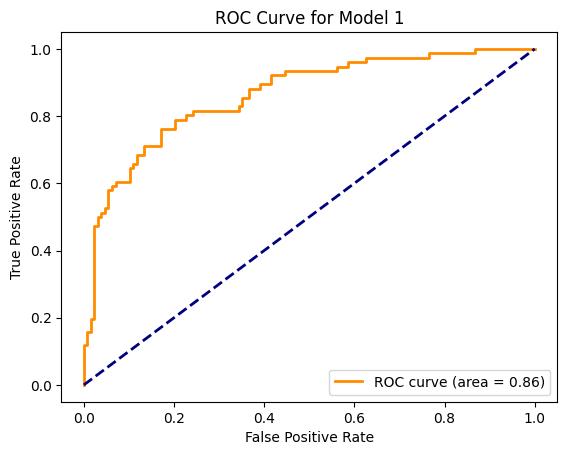

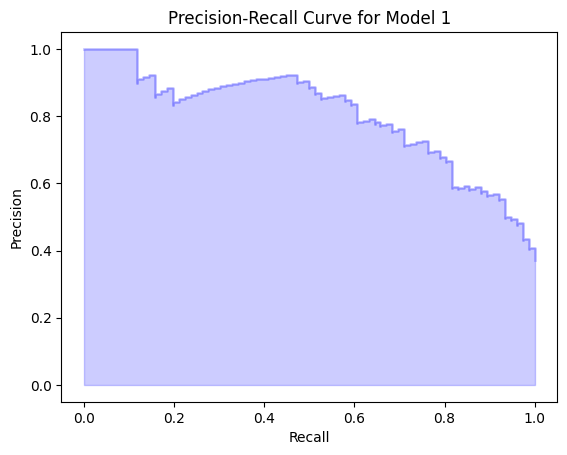

7/7 [==============================] - 0s 5ms/step
Model 2:
Accuracy: 0.804
BACC: 0.806
Sn: 0.801
Sp: 0.81
MCC: 0.571
AUC: 0.866
AP: 0.803
F1: 0.701



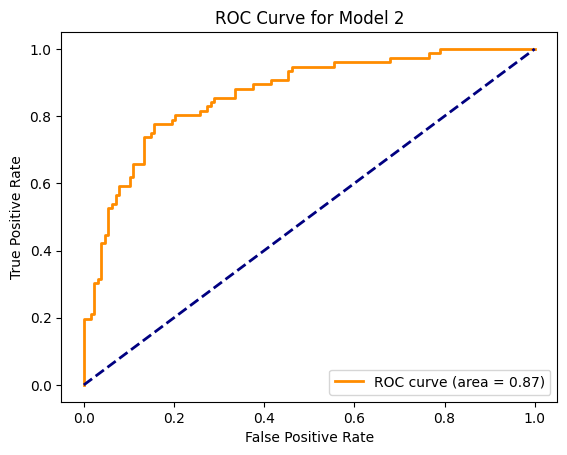

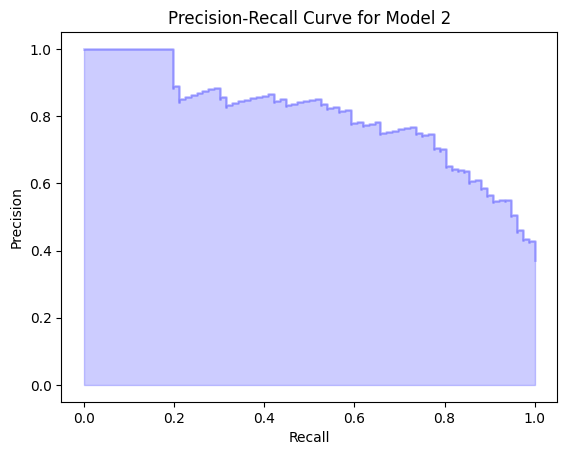

7/7 [==============================] - 0s 4ms/step
Model 3:
Accuracy: 0.824
BACC: 0.812
Sn: 0.854
Sp: 0.77
MCC: 0.621
AUC: 0.87
AP: 0.796
F1: 0.76



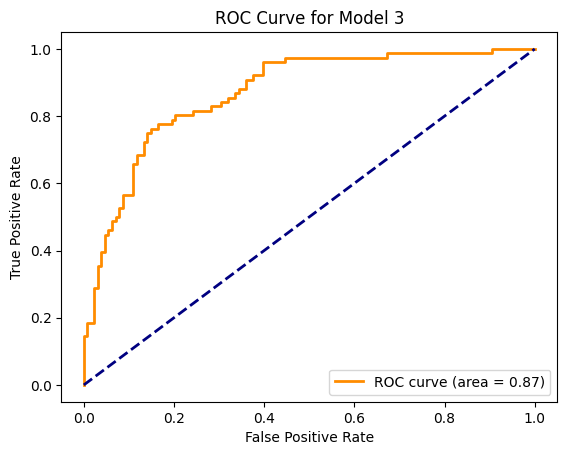

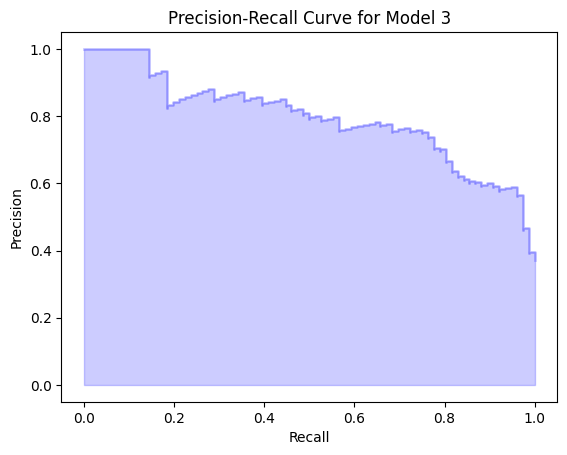

7/7 [==============================] - 0s 4ms/step
Model 4:
Accuracy: 0.784
BACC: 0.77
Sn: 0.844
Sp: 0.695
MCC: 0.547
AUC: 0.845
AP: 0.761
F1: 0.722



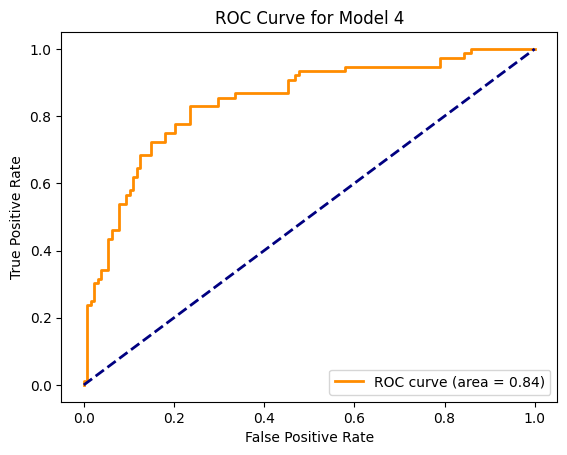

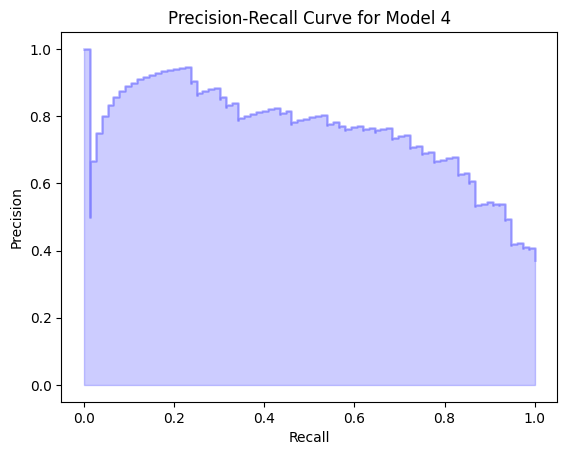

7/7 [==============================] - 0s 5ms/step
Model 5:
Accuracy: 0.814
BACC: 0.804
Sn: 0.836
Sp: 0.771
MCC: 0.596
AUC: 0.864
AP: 0.791
F1: 0.74



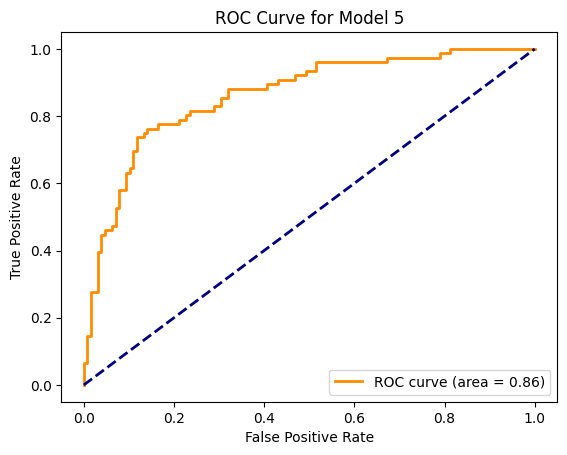

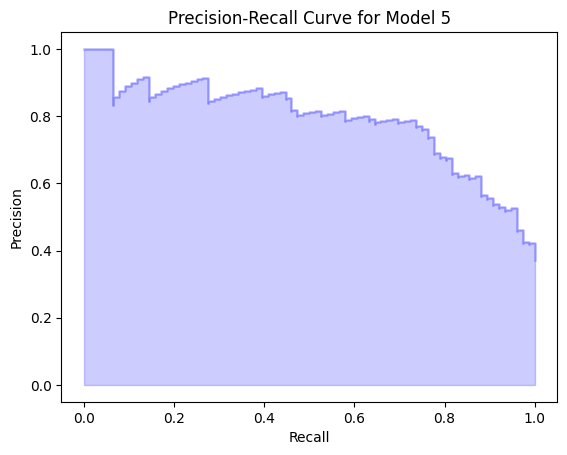

7/7 [==============================] - 0s 5ms/step
Model 6:
Accuracy: 0.799
BACC: 0.786
Sn: 0.832
Sp: 0.74
MCC: 0.567
AUC: 0.855
AP: 0.77
F1: 0.725



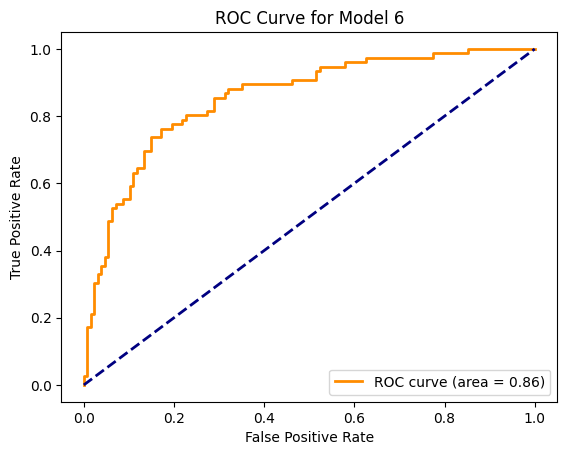

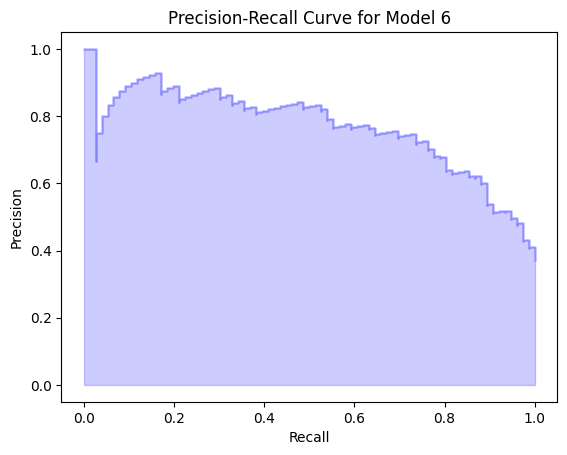

7/7 [==============================] - 0s 7ms/step
Model 7:
Accuracy: 0.804
BACC: 0.793
Sn: 0.828
Sp: 0.757
MCC: 0.575
AUC: 0.858
AP: 0.765
F1: 0.726



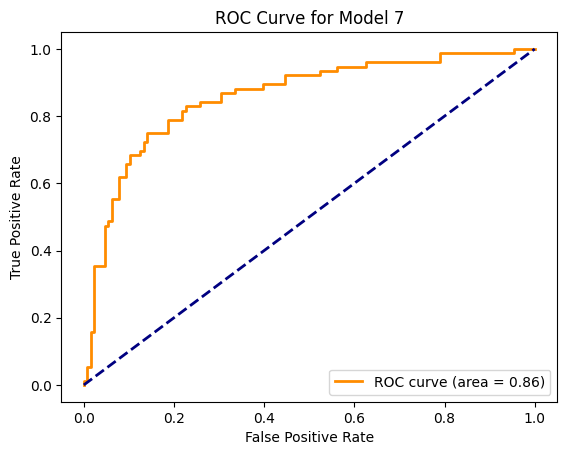

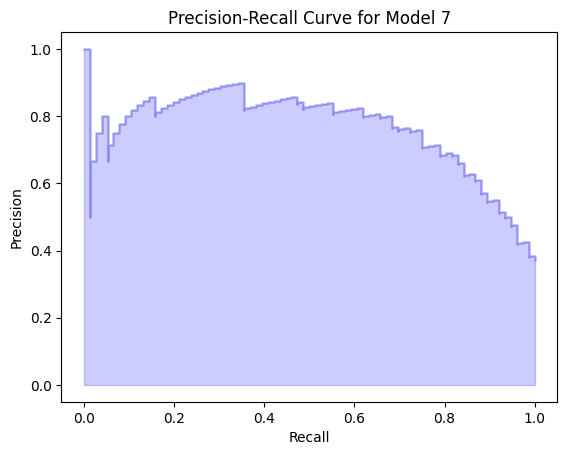

7/7 [==============================] - 0s 7ms/step
Model 8:
Accuracy: 0.804
BACC: 0.79
Sn: 0.844
Sp: 0.737
MCC: 0.581
AUC: 0.859
AP: 0.787
F1: 0.737



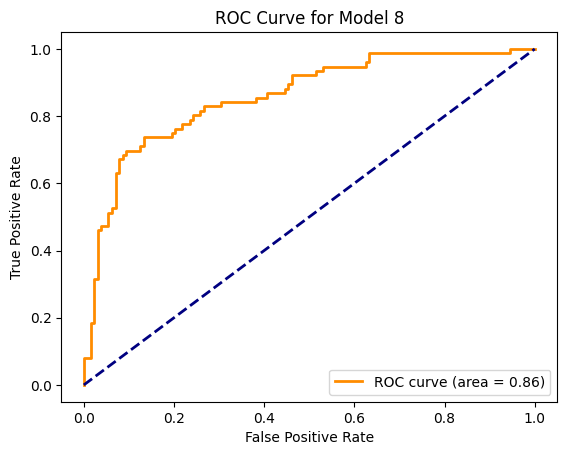

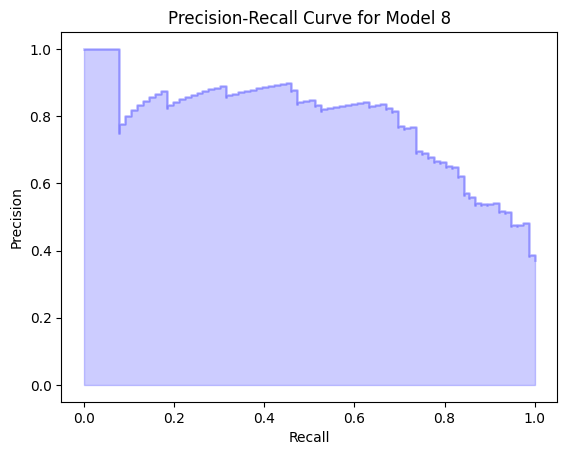

7/7 [==============================] - 0s 7ms/step
Model 9:
Accuracy: 0.794
BACC: 0.786
Sn: 0.807
Sp: 0.766
MCC: 0.55
AUC: 0.852
AP: 0.752
F1: 0.7



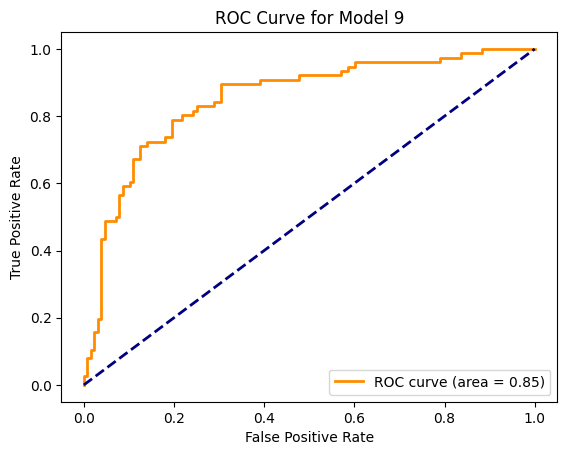

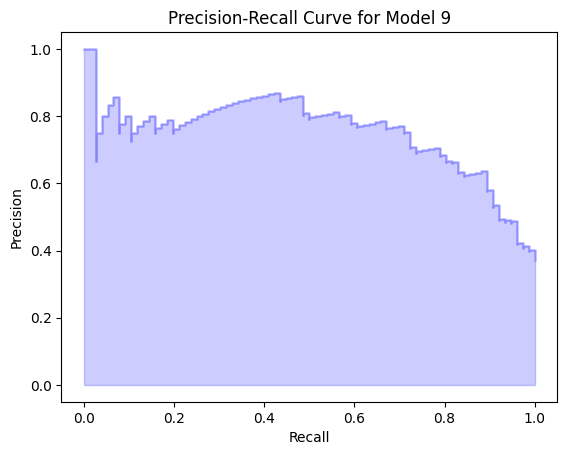

7/7 [==============================] - 0s 5ms/step
Model 10:
Accuracy: 0.824
BACC: 0.811
Sn: 0.865
Sp: 0.756
MCC: 0.625
AUC: 0.86
AP: 0.78
F1: 0.766



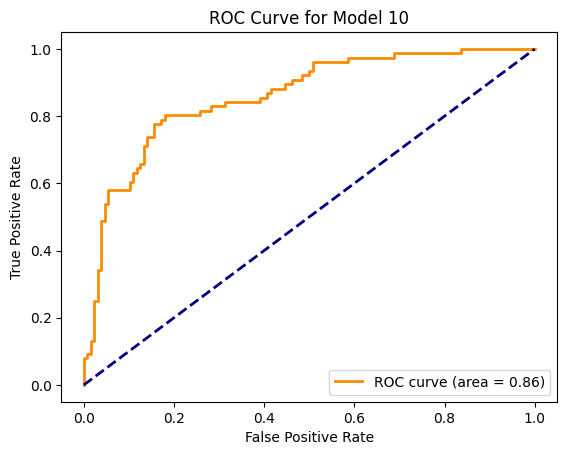

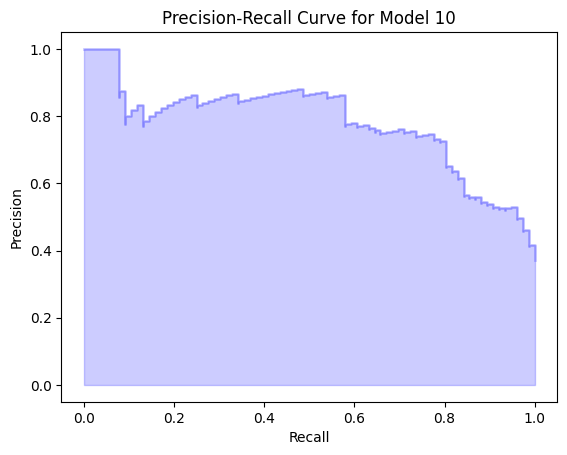

Average Accuracy: 0.804 ± 0.013
Average BACC: 0.793 ± 0.014
Average Sn: 0.835 ± 0.018
Average Sp: 0.752 ± 0.031
Average MCC: 0.578 ± 0.027
Average AUC: 0.859 ± 0.007
Average AP: 0.781 ± 0.017
Average F1: 0.73 ± 0.021


12/12 [==============================] - 0s 3ms/step

Accuracy: 0.868

BACC: 0.864

Sn: 0.855

Sp: 0.874

MCC: 0.705

AUC: 0.924

AP: 0.933

F1: 0.902


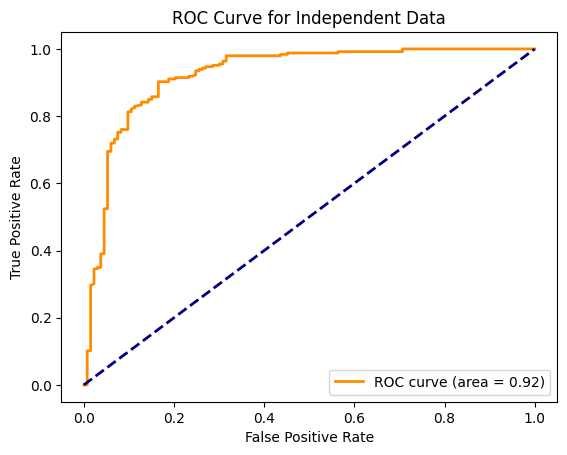

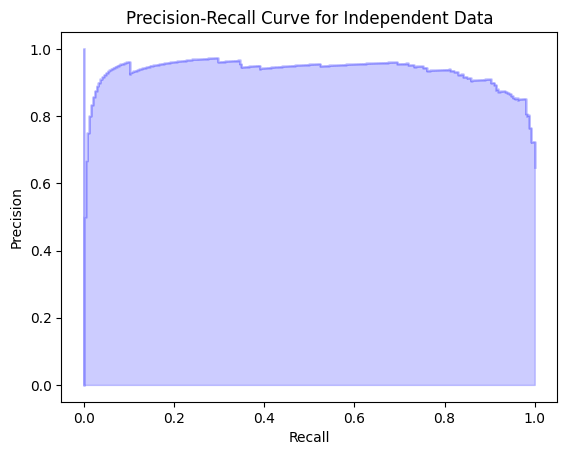

In [ ]:
from keras.models import load_model
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix, roc_curve, auc, average_precision_score, precision_recall_curve, f1_score, accuracy_score
import numpy as np
import pandas as pd
import math

path = "/content/drive/MyDrive/watshara_data/"
data_ = pd.read_csv(path + 'Dts_AEDN1000.csv')
data = data_.iloc[:, :-1].values
labels = data_.iloc[:, -1].values
y = labels
Xt = scale(data)
yt = labels


# Load the best model from one of the folds (e.g., fold 10)
model_path = path + 'GAN/GAN_fold_10.h5'
clf = load_model(model_path)


# Predict the labels for the independent dataset
y_score = clf.predict(Xt)
y_class = np.argmax(y_score, axis=1)

# Calculate metrics
accuracy = accuracy_score(yt, y_class)
f1 = f1_score(yt, y_class)
TP, FP, FN, TN = confusion_matrix(yt, y_class).ravel()
Sn = TP / (TP + FN)
Sp = TN / (TN + FP)
MCC = (TP * TN - FP * FN) / math.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
BACC = 0.5 * TP / (TP + FN) + 0.5 * TN / (TN + FP)
fpr, tpr, _ = roc_curve(yt, y_score[:, 1])
auc_roc = auc(fpr, tpr)
precision, recall, _ = precision_recall_curve(yt, y_score[:, 1])
average_precision = average_precision_score(yt, y_score[:, 1])

# Print the results
print(f"Accuracy: {round(accuracy, 3)}")
print(f"BACC: {round(BACC, 3)}")
print(f"Sn: {round(Sn, 3)}")
print(f"Sp: {round(Sp, 3)}")
print(f"MCC: {round(MCC, 3)}")
print(f"AUC: {round(auc_roc, 3)}")
print(f"AP: {round(average_precision, 3)}")
print(f"F1: {round(f1, 3)}")

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Independent Data')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
plt.figure()
plt.step(recall, precision, where='post', color='b', alpha=0.2, lw=lw)
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Independent Data')
plt.show()


In [ ]:
import os
import statistics
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import scale
from keras.layers import Input, Dense, BatchNormalization, LeakyReLU, Dropout
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, roc_curve, auc, average_precision_score, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math


optimizer = Adam(learning_rate=0.0002, beta_1=0.5)

# Discriminator
D = Sequential()
D.add(Dense(64, input_dim=input_dimwx))
D.add(LeakyReLU(alpha=0.2))
D.add(Dropout(0.3))
D.add(Dense(32))
D.add(LeakyReLU(alpha=0.2))
D.add(Dense(out_dim, activation='sigmoid'))
img = Input(shape=(input_dimwx,))
validity = D(img)
Discriminator = Model(img, validity)
Discriminator.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['binary_accuracy'])

# Generator
G = Sequential()
G.add(Dense(64, input_dim=input_dimwx))
G.add(LeakyReLU(alpha=0.2))
G.add(BatchNormalization(momentum=0.8))
G.add(Dense(64))
G.add(LeakyReLU(alpha=0.2))
G.add(BatchNormalization(momentum=0.8))
G.add(Dense(32))
G.add(LeakyReLU(alpha=0.2))
G.add(BatchNormalization(momentum=0.8))
G.add(Dense(input_dimwx, activation='tanh'))
noise = Input(shape=(input_dimwx,))
G_img = G(noise)
Generator = Model(noise, G_img)

z = Input(shape=(input_dimwx,))
G_img = Generator(z)
Discriminator.trainable = False
validity = Discriminator(G_img)
GAN = Model(z, validity)
GAN.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['binary_accuracy'])

interp_tpr_collection = []

def categorical_probas_to_classes(p):
    return np.argmax(p, axis=1)

def to_categorical(y, nb_classes=None):
    y = np.array(y, dtype='int')
    if not nb_classes:
        nb_classes = np.max(y) + 1
    Y = np.zeros((len(y), nb_classes))
    for i in range(len(y)):
        Y[i, y[i]] = 1
    return Y


# Independent dataset
data_ = pd.read_csv(path + 'Dts_AEDN1000.csv')
data = data_.iloc[:, :-1].values
labels = data_.iloc[:, -1].values
y = labels
Xt = scale(data)
yt = labels

# Initialize metric collections for independent data
BACC_ind = []
Sn_ind = []
Sp_ind = []
MCC_ind = []
AUC_ind = []
AP_ind = []

mean_recall_ind = np.linspace(0, 1, 100)
all_precision_ind = []
mean_tpr_ind = 0.0

interp_tpr_ind_collection = []

# Evaluate on independent dataset
for fold_num in range(1, 11):
    model_path = f'GAN_fold_{fold_num}.h5'

    clf = GAN
    clf.load_weights(model_path)

    y_score = clf.predict(Xt)
    y_class = categorical_probas_to_classes(y_score)

    TP, FP, FN, TN = confusion_matrix(yt, y_class).ravel()
    Sn_ind.append(TP / (TP + FN))
    Sp_ind.append(TN / (TN + FP))
    MCC = (TP * TN - FP * FN) / math.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
    MCC_ind.append(MCC)
    BACC_ind.append(0.5 * TP / (TP + FN) + 0.5 * TN / (TN + FP))

    fpr, tpr, _ = roc_curve(yt, y_score[:, 1])
    interp_tpr = np.interp(base_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    interp_tpr_ind_collection.append(interp_tpr)
    auc_roc = auc(fpr, tpr)
    AUC_ind.append(auc_roc)

    precision, recall, _ = precision_recall_curve(yt, y_score[:, 1])
    average_precision = average_precision_score(yt, y_score[:, 1])
    recall = np.flipud(recall)
    precision = np.flipud(precision)
    mean_precision = np.interp(mean_recall_ind, recall, precision)
    all_precision_ind.append(mean_precision)
    AP_ind.append(average_precision)

print(f"BACC (independent): {round(statistics.mean(BACC_ind), 3)} ± {round(statistics.stdev(BACC_ind), 3)}")
print(f"Sn (independent): {round(statistics.mean(Sn_ind), 3)} ± {round(statistics.stdev(Sn_ind), 3)}")
print(f"Sp (independent): {round(statistics.mean(Sp_ind), 3)} ± {round(statistics.stdev(Sp_ind), 3)}")
print(f"MCC (independent): {round(statistics.mean(MCC_ind), 3)} ± {round(statistics.stdev(MCC_ind), 3)}")
print(f"AUC (independent): {round(statistics.mean(AUC_ind), 3)} ± {round(statistics.stdev(AUC_ind), 3)}")
print(f"AP (independent): {round(statistics.mean(AP_ind), 3)} ± {round(statistics.stdev(AP_ind), 3)}")

mean_tpr_ind = np.mean(interp_tpr_ind_collection, axis=0)
mean_tpr_ind[-1] = 1.0

mean_precision_ind = np.mean(all_precision_ind, axis=0)

np.savez(r'Draw graphics\ROC curve\GAN_PCA_Independent.npz', fpr=base_fpr, tpr=mean_tpr_ind, roc_auc=AUC_ind)
np.savez(r'Draw graphics\PR curve\GAN_PCA_Independent.npz', recall=mean_recall_ind, precision=mean_precision_ind, average_precision=AP_ind)

plt.figure()
lw = 2
plt.plot(base_fpr, mean_tpr_ind, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % np.mean(AUC_ind))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Independent Data')
plt.legend(loc="lower right")
plt.show()

In [ ]:

import statistics
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import scale
from keras.layers import Input, Dense
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.models import Sequential, Model
# from keras.optimizers import adam_v2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from keras.optimizers import Adam
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split

# X_train_whole, X_ind_test, y_train_whole, y_ind_test = train_test_split(X_new, y_new, test_size=0.2, random_state=1111)

path = "/content/drive/MyDrive/watshara_data/"
data_ = pd.read_csv(path + 'Dtr_AEDN1000.csv')
data = data_.iloc[:, :-1].values
labels = data_.iloc[:, -1].values
y = labels

# X = np.reshape(X, (-1, 1, n1))
X = scale(data)

# X_train_whole = scale(X_train_whole)
[sample_num, input_dimwx]=np.shape(X)
# X = X_train_whole
# y = y_train_whole
out_dim=2

optimizer = Adam(0.5)
n_y_value = 2

D = Sequential()
D.add(Dense(64))
D.add(LeakyReLU(alpha=0.2))
D.add(Dense(32))
D.add(Dense(2, activation='sigmoid'))
img = Input(shape=(n_y_value,))
validity = D(img)
Discriminator = Model(img,validity)
Discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['binary_accuracy'])



N_ideas = input_dimwx
G = Sequential()
G.add(Dense(64,input_dim=N_ideas))
G.add(LeakyReLU(alpha=0.2))
G.add(BatchNormalization(momentum=0.8))
G.add(Dense(64))
G.add(LeakyReLU(alpha=0.2))
G.add(BatchNormalization(momentum=0.8))
G.add(Dense(32))
G.add(LeakyReLU(alpha=0.2))
G.add(BatchNormalization(momentum=0.8))
G.add(Dense(n_y_value, activation='tanh'))
noise = Input(shape=(N_ideas,))
G_img = G(noise)
Generator = Model(noise,G_img)

z = Input(shape=(N_ideas,))
G_img = Generator(z)
Discriminator.trainable = False
validity = Discriminator(G_img)
GAN = Model(z,validity)
GAN.compile(loss='binary_crossentropy', optimizer=optimizer, metrics =['binary_accuracy'])

BACC_collecton = []
Sn_collecton = []
Sp_collecton = []
MCC_collecton = []
AUC_collecton = []
AP=[]

mean_recall = np.linspace(0, 1, 100)
all_precision = []
base_fpr = np.linspace(0, 1, 100)
mean_tpr = 0.0

interp_tpr_collection = []


def categorical_probas_to_classes(p):
    return np.argmax(p, axis=1)


def to_categorical(y, nb_classes=None):
    y = np.array(y, dtype='int')
    if not nb_classes:
        nb_classes = np.max(y)+1
    Y = np.zeros((len(y), nb_classes))
    for i in range(len(y)):
        Y[i, y[i]] = 1
    return Y

skf = StratifiedKFold(n_splits=10)
for train, test in skf.split(X, y):
    X_train, X_valid, y_train, y_valid = np.take(X, train.tolist(), axis=0), np.take(X, test.tolist(), axis=0), np.take(y, train.tolist(), axis=0), np.take(y, test.tolist(), axis=0)

    y_train = to_categorical(y_train)

    clf = GAN
    hist = clf.fit(X_train, y_train, batch_size=64, epochs=60)
    y_score = clf.predict(X_valid)
    y_class = categorical_probas_to_classes(y_score)
    TP, FP, FN, TN = confusion_matrix(y_valid, y_class).ravel() # shape [ [True-Positive, False-positive], [False-negative, True-negative] ]
    Sn_collecton.append(TP/(TP+FN))
    Sp_collecton.append(TN/(TN+FP))
    MCC = (TP*TN-FP*FN)/math.pow(((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)),0.5)
    MCC_collecton.append(MCC)
    BACC_collecton.append(0.5*TP/(TP+FN)+0.5*TN/(TN+FP))
    # ROC curve
    fpr, tpr, _ = roc_curve(y_valid, y_score[:, 1])
    interp_tpr = np.interp(base_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    interp_tpr_collection.append(interp_tpr)
    auc_roc = auc(fpr, tpr)
    AUC_collecton.append(auc_roc)
    # PR curve
    precision, recall, _ = precision_recall_curve(y_valid, y_score[:, 1])
    average_precision = average_precision_score(y_valid, y_score[:, 1])
    recall = np.flipud(recall)
    precision = np.flipud(precision)

    mean_precision = np.interp(mean_recall, recall, precision)
    all_precision.append(mean_precision)
    AP.append(average_precision)

#
print(round(statistics.mean(BACC_collecton),3),'±',round(statistics.stdev(BACC_collecton),3))
print(round(statistics.mean(Sn_collecton),3),'±',round(statistics.stdev(Sn_collecton),3))
print(round(statistics.mean(Sp_collecton),3),'±',round(statistics.stdev(Sp_collecton),3))
print(round(statistics.mean(MCC_collecton),3),'±',round(statistics.stdev(MCC_collecton),3))
print(round(statistics.mean(AUC_collecton),3),'±',round(statistics.stdev(AUC_collecton),3))
print(round(statistics.mean(AP),3),'±',round(statistics.stdev(AP),3))

#
mean_tpr = np.mean(interp_tpr_collection, axis=0)
mean_tpr[-1] = 1.0

# Calculate the mean precision
mean_precision = np.mean(all_precision, axis=0)

#
np.savez(r'Draw graphics\ROC curve\GAN_PCA_All_cross_vaild.npz', fpr=base_fpr, tpr=mean_tpr, roc_auc=AUC_collecton)

#
np.savez(r'Draw graphics\PR curve\GAN_PCA_All_cross_vaild.npz', recall=mean_recall, precision=mean_precision, average_precision=AP)

#
plt.figure()
lw = 2
plt.plot(base_fpr, mean_tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % np.mean(AUC_collecton))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('10 k-fold cross vaild')
plt.legend(loc="lower right")
plt.show()


Epoch 1/60

32/32 [==============================] - 2s 5ms/step - loss: 0.6996 - binary_accuracy: 0.4920

Epoch 2/60

32/32 [==============================] - 0s 4ms/step - loss: 0.6959 - binary_accuracy: 0.5211

Epoch 3/60

32/32 [==============================] - 0s 4ms/step - loss: 0.6872 - binary_accuracy: 0.5407

Epoch 4/60

32/32 [==============================] - 0s 4ms/step - loss: 0.6873 - binary_accuracy: 0.5429

Epoch 5/60

32/32 [==============================] - 0s 5ms/step - loss: 0.6866 - binary_accuracy: 0.5364

Epoch 6/60

32/32 [==============================] - 0s 5ms/step - loss: 0.6907 - binary_accuracy: 0.5198

Epoch 7/60

32/32 [==============================] - 0s 6ms/step - loss: 0.6893 - binary_accuracy: 0.5256

Epoch 8/60

32/32 [==============================] - 0s 5ms/step - loss: 0.6862 - binary_accuracy: 0.5422

Epoch 9/60

32/32 [==============================] - 0s 4ms/step - loss: 0.6893 - binary_accuracy: 0.5291

Epoch 10/60

32/32 [=================

<ipython-input-5-ba6079a558c0>:117: RuntimeWarning: invalid value encountered in scalar divide

  Sp_collecton.append(TN/(TN+FP))

<ipython-input-5-ba6079a558c0>:118: RuntimeWarning: invalid value encountered in divide

  MCC = (TP*TN-FP*FN)/math.pow(((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)),0.5)

<ipython-input-5-ba6079a558c0>:120: RuntimeWarning: invalid value encountered in scalar divide

  BACC_collecton.append(0.5*TP/(TP+FN)+0.5*TN/(TN+FP))


32/32 [==============================] - 0s 8ms/step - loss: 0.7112 - binary_accuracy: 0.5000

Epoch 2/60

32/32 [==============================] - 0s 7ms/step - loss: 0.7108 - binary_accuracy: 0.5000

Epoch 3/60

32/32 [==============================] - 0s 7ms/step - loss: 0.7097 - binary_accuracy: 0.5000

Epoch 4/60

32/32 [==============================] - 0s 8ms/step - loss: 0.7098 - binary_accuracy: 0.5000

Epoch 5/60

32/32 [==============================] - 0s 8ms/step - loss: 0.7099 - binary_accuracy: 0.5000

Epoch 6/60

32/32 [==============================] - 0s 8ms/step - loss: 0.7097 - binary_accuracy: 0.5000

Epoch 7/60

32/32 [==============================] - 0s 8ms/step - loss: 0.7095 - binary_accuracy: 0.5000

Epoch 8/60

32/32 [==============================] - 0s 7ms/step - loss: 0.7097 - binary_accuracy: 0.5000

Epoch 9/60

32/32 [==============================] - 0s 6ms/step - loss: 0.7095 - binary_accuracy: 0.5000

Epoch 10/60

32/32 [=============================

<ipython-input-5-ba6079a558c0>:117: RuntimeWarning: invalid value encountered in scalar divide

  Sp_collecton.append(TN/(TN+FP))

<ipython-input-5-ba6079a558c0>:118: RuntimeWarning: invalid value encountered in divide

  MCC = (TP*TN-FP*FN)/math.pow(((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)),0.5)

<ipython-input-5-ba6079a558c0>:120: RuntimeWarning: invalid value encountered in scalar divide

  BACC_collecton.append(0.5*TP/(TP+FN)+0.5*TN/(TN+FP))


32/32 [==============================] - 0s 5ms/step - loss: 0.7094 - binary_accuracy: 0.5000

Epoch 2/60

32/32 [==============================] - 0s 5ms/step - loss: 0.7095 - binary_accuracy: 0.5000

Epoch 3/60

32/32 [==============================] - 0s 4ms/step - loss: 0.7096 - binary_accuracy: 0.5000

Epoch 4/60

32/32 [==============================] - 0s 5ms/step - loss: 0.7094 - binary_accuracy: 0.5000

Epoch 5/60

32/32 [==============================] - 0s 5ms/step - loss: 0.7095 - binary_accuracy: 0.5000

Epoch 6/60

32/32 [==============================] - 0s 8ms/step - loss: 0.7094 - binary_accuracy: 0.5000

Epoch 7/60

32/32 [==============================] - 0s 8ms/step - loss: 0.7094 - binary_accuracy: 0.5000

Epoch 8/60

32/32 [==============================] - 0s 7ms/step - loss: 0.7095 - binary_accuracy: 0.5000

Epoch 9/60

32/32 [==============================] - 0s 7ms/step - loss: 0.7095 - binary_accuracy: 0.5000

Epoch 10/60

32/32 [=============================

<ipython-input-5-ba6079a558c0>:117: RuntimeWarning: invalid value encountered in scalar divide

  Sp_collecton.append(TN/(TN+FP))

<ipython-input-5-ba6079a558c0>:118: RuntimeWarning: invalid value encountered in divide

  MCC = (TP*TN-FP*FN)/math.pow(((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)),0.5)

<ipython-input-5-ba6079a558c0>:120: RuntimeWarning: invalid value encountered in scalar divide

  BACC_collecton.append(0.5*TP/(TP+FN)+0.5*TN/(TN+FP))


32/32 [==============================] - 0s 5ms/step - loss: 0.7096 - binary_accuracy: 0.5000

Epoch 2/60

32/32 [==============================] - 0s 5ms/step - loss: 0.7097 - binary_accuracy: 0.5000

Epoch 3/60

32/32 [==============================] - 0s 5ms/step - loss: 0.7096 - binary_accuracy: 0.5000

Epoch 4/60

32/32 [==============================] - 0s 5ms/step - loss: 0.7096 - binary_accuracy: 0.5000

Epoch 5/60

32/32 [==============================] - 0s 5ms/step - loss: 0.7097 - binary_accuracy: 0.5000

Epoch 6/60

32/32 [==============================] - 0s 4ms/step - loss: 0.7096 - binary_accuracy: 0.5000

Epoch 7/60

32/32 [==============================] - 0s 6ms/step - loss: 0.7095 - binary_accuracy: 0.5000

Epoch 8/60

32/32 [==============================] - 0s 6ms/step - loss: 0.7092 - binary_accuracy: 0.4992

Epoch 9/60

32/32 [==============================] - 0s 6ms/step - loss: 0.7085 - binary_accuracy: 0.5005

Epoch 10/60

32/32 [=============================

<ipython-input-5-ba6079a558c0>:117: RuntimeWarning: invalid value encountered in scalar divide

  Sp_collecton.append(TN/(TN+FP))

<ipython-input-5-ba6079a558c0>:118: RuntimeWarning: invalid value encountered in divide

  MCC = (TP*TN-FP*FN)/math.pow(((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)),0.5)

<ipython-input-5-ba6079a558c0>:120: RuntimeWarning: invalid value encountered in scalar divide

  BACC_collecton.append(0.5*TP/(TP+FN)+0.5*TN/(TN+FP))


32/32 [==============================] - 0s 8ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 2/60

32/32 [==============================] - 0s 8ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 3/60

32/32 [==============================] - 0s 8ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 4/60

32/32 [==============================] - 0s 8ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 5/60

32/32 [==============================] - 0s 7ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 6/60

32/32 [==============================] - 0s 7ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 7/60

32/32 [==============================] - 0s 8ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 8/60

32/32 [==============================] - 0s 9ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 9/60

32/32 [==============================] - 0s 8ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 10/60

32/32 [=============================

<ipython-input-5-ba6079a558c0>:117: RuntimeWarning: invalid value encountered in scalar divide

  Sp_collecton.append(TN/(TN+FP))

<ipython-input-5-ba6079a558c0>:118: RuntimeWarning: invalid value encountered in divide

  MCC = (TP*TN-FP*FN)/math.pow(((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)),0.5)

<ipython-input-5-ba6079a558c0>:120: RuntimeWarning: invalid value encountered in scalar divide

  BACC_collecton.append(0.5*TP/(TP+FN)+0.5*TN/(TN+FP))


32/32 [==============================] - 0s 5ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 2/60

32/32 [==============================] - 0s 5ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 3/60

32/32 [==============================] - 0s 4ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 4/60

32/32 [==============================] - 0s 5ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 5/60

32/32 [==============================] - 0s 4ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 6/60

32/32 [==============================] - 0s 5ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 7/60

32/32 [==============================] - 0s 6ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 8/60

32/32 [==============================] - 0s 6ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 9/60

32/32 [==============================] - 0s 4ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 10/60

32/32 [=============================

<ipython-input-5-ba6079a558c0>:117: RuntimeWarning: invalid value encountered in scalar divide

  Sp_collecton.append(TN/(TN+FP))

<ipython-input-5-ba6079a558c0>:118: RuntimeWarning: invalid value encountered in divide

  MCC = (TP*TN-FP*FN)/math.pow(((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)),0.5)

<ipython-input-5-ba6079a558c0>:120: RuntimeWarning: invalid value encountered in scalar divide

  BACC_collecton.append(0.5*TP/(TP+FN)+0.5*TN/(TN+FP))


32/32 [==============================] - 0s 6ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 2/60

32/32 [==============================] - 0s 5ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 3/60

32/32 [==============================] - 0s 5ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 4/60

32/32 [==============================] - 0s 5ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 5/60

32/32 [==============================] - 0s 5ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 6/60

32/32 [==============================] - 0s 6ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 7/60

32/32 [==============================] - 0s 5ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 8/60

32/32 [==============================] - 0s 4ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 9/60

32/32 [==============================] - 0s 5ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 10/60

32/32 [=============================

<ipython-input-5-ba6079a558c0>:117: RuntimeWarning: invalid value encountered in scalar divide

  Sp_collecton.append(TN/(TN+FP))

<ipython-input-5-ba6079a558c0>:118: RuntimeWarning: invalid value encountered in divide

  MCC = (TP*TN-FP*FN)/math.pow(((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)),0.5)

<ipython-input-5-ba6079a558c0>:120: RuntimeWarning: invalid value encountered in scalar divide

  BACC_collecton.append(0.5*TP/(TP+FN)+0.5*TN/(TN+FP))


32/32 [==============================] - 0s 8ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 2/60

32/32 [==============================] - 0s 8ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 3/60

32/32 [==============================] - 0s 7ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 4/60

32/32 [==============================] - 0s 8ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 5/60

32/32 [==============================] - 0s 7ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 6/60

32/32 [==============================] - 0s 8ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 7/60

32/32 [==============================] - 0s 8ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 8/60

32/32 [==============================] - 0s 6ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 9/60

32/32 [==============================] - 0s 6ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 10/60

32/32 [=============================

<ipython-input-5-ba6079a558c0>:117: RuntimeWarning: invalid value encountered in scalar divide

  Sp_collecton.append(TN/(TN+FP))

<ipython-input-5-ba6079a558c0>:118: RuntimeWarning: invalid value encountered in divide

  MCC = (TP*TN-FP*FN)/math.pow(((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)),0.5)

<ipython-input-5-ba6079a558c0>:120: RuntimeWarning: invalid value encountered in scalar divide

  BACC_collecton.append(0.5*TP/(TP+FN)+0.5*TN/(TN+FP))


32/32 [==============================] - 0s 5ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 2/60

32/32 [==============================] - 0s 5ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 3/60

32/32 [==============================] - 0s 5ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 4/60

32/32 [==============================] - 0s 6ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 5/60

32/32 [==============================] - 0s 5ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 6/60

32/32 [==============================] - 0s 5ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 7/60

32/32 [==============================] - 0s 5ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 8/60

32/32 [==============================] - 0s 5ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 9/60

32/32 [==============================] - 0s 5ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 10/60

32/32 [=============================

<ipython-input-5-ba6079a558c0>:117: RuntimeWarning: invalid value encountered in scalar divide

  Sp_collecton.append(TN/(TN+FP))

<ipython-input-5-ba6079a558c0>:118: RuntimeWarning: invalid value encountered in divide

  MCC = (TP*TN-FP*FN)/math.pow(((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)),0.5)

<ipython-input-5-ba6079a558c0>:120: RuntimeWarning: invalid value encountered in scalar divide

  BACC_collecton.append(0.5*TP/(TP+FN)+0.5*TN/(TN+FP))


32/32 [==============================] - 0s 7ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 2/60

32/32 [==============================] - 0s 7ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 3/60

32/32 [==============================] - 0s 7ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 4/60

32/32 [==============================] - 0s 8ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 5/60

32/32 [==============================] - 0s 8ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 6/60

32/32 [==============================] - 0s 7ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 7/60

32/32 [==============================] - 0s 7ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 8/60

32/32 [==============================] - 0s 7ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 9/60

32/32 [==============================] - 0s 7ms/step - loss: 0.7086 - binary_accuracy: 0.5000

Epoch 10/60

32/32 [=============================

<ipython-input-5-ba6079a558c0>:117: RuntimeWarning: invalid value encountered in scalar divide

  Sp_collecton.append(TN/(TN+FP))

<ipython-input-5-ba6079a558c0>:118: RuntimeWarning: invalid value encountered in divide

  MCC = (TP*TN-FP*FN)/math.pow(((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)),0.5)

<ipython-input-5-ba6079a558c0>:120: RuntimeWarning: invalid value encountered in scalar divide

  BACC_collecton.append(0.5*TP/(TP+FN)+0.5*TN/(TN+FP))


ValueError: cannot convert NaN to integer ratio

Epoch 1/60

13/13 [==============================] - 1s 7ms/step - loss: 0.6945 - binary_accuracy: 0.4645

Epoch 2/60

13/13 [==============================] - 0s 7ms/step - loss: 0.6847 - binary_accuracy: 0.5349

Epoch 3/60

13/13 [==============================] - 0s 8ms/step - loss: 0.6755 - binary_accuracy: 0.5901

Epoch 4/60

13/13 [==============================] - 0s 7ms/step - loss: 0.6706 - binary_accuracy: 0.6170

Epoch 5/60

13/13 [==============================] - 0s 7ms/step - loss: 0.6643 - binary_accuracy: 0.6526

Epoch 6/60

13/13 [==============================] - 0s 7ms/step - loss: 0.6606 - binary_accuracy: 0.6740

Epoch 7/60

13/13 [==============================] - 0s 8ms/step - loss: 0.6560 - binary_accuracy: 0.7071

Epoch 8/60

13/13 [==============================] - 0s 8ms/step - loss: 0.6528 - binary_accuracy: 0.7224

Epoch 9/60

13/13 [==============================] - 0s 8ms/step - loss: 0.6503 - binary_accuracy: 0.7359

Epoch 10/60

13/13 [=================

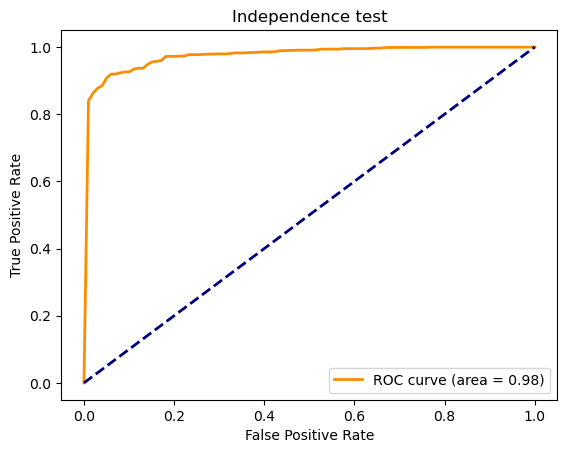

In [ ]:
# 独立测试集
import statistics
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import scale
from keras.layers import Input, Dense
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import adam_v2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split


# X_new = scale(X_new)
[sample_num,input_dimwx]=np.shape(X_new)
X = X_new

y = y_new
out_dim=2

optimizer = adam_v2.Adam(0.0002, 0.5)
n_y_value = 2

D = Sequential()
D.add(Dense(64))
D.add(LeakyReLU(alpha=0.2))
D.add(Dense(32))
D.add(Dense(2, activation='sigmoid'))
img = Input(shape=(n_y_value,))
validity = D(img)
Discriminator = Model(img,validity)
Discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['binary_accuracy'])


#####构建生成器，并组合生成器和鉴别器成GAN
N_ideas = input_dimwx
G = Sequential()
G.add(Dense(64,input_dim=N_ideas))
G.add(LeakyReLU(alpha=0.2))
G.add(BatchNormalization(momentum=0.8))
G.add(Dense(64))
G.add(LeakyReLU(alpha=0.2))
G.add(BatchNormalization(momentum=0.8))
G.add(Dense(32))
G.add(LeakyReLU(alpha=0.2))
G.add(BatchNormalization(momentum=0.8))
G.add(Dense(n_y_value, activation='tanh'))
noise = Input(shape=(N_ideas,))
G_img = G(noise)
Generator = Model(noise,G_img)

z = Input(shape=(N_ideas,))
G_img = Generator(z)
Discriminator.trainable = False
validity = Discriminator(G_img)
GAN = Model(z,validity)
GAN.compile(loss='binary_crossentropy', optimizer=optimizer, metrics =['binary_accuracy'])

BACC_collecton = []
Sn_collecton = []
Sp_collecton = []
MCC_collecton = []
AUC_collecton = []
AP=[]
mean_recall = np.linspace(0, 1, 100)
all_precision = []

base_fpr = np.linspace(0, 1, 100)
mean_tpr = 0.0
# 新的TPR集合
interp_tpr_collection = []


def categorical_probas_to_classes(p):
    return np.argmax(p, axis=1)


def to_categorical(y, nb_classes=None):
    y = np.array(y, dtype='int')
    if not nb_classes:
        nb_classes = np.max(y)+1
    Y = np.zeros((len(y), nb_classes))
    for i in range(len(y)):
        Y[i, y[i]] = 1
    return Y

for i in range(10):
    # dataset splitting
    X_train_whole, X_ind_test, y_train_whole, y_ind_test = train_test_split(X, y, test_size=0.2, random_state=i)

    y_train = to_categorical(y_train_whole)

    clf = GAN
    hist = clf.fit(X_train_whole, y_train, batch_size=64, epochs=60)
    y_score = clf.predict(X_ind_test)
    y_class = categorical_probas_to_classes(y_score)
    TP, FP, FN, TN = confusion_matrix(y_ind_test, y_class).ravel() # shape [ [True-Positive, False-positive], [False-negative, True-negative] ]
    Sn_collecton.append(TP/(TP+FN))
    Sp_collecton.append(TN/(TN+FP))
    MCC = (TP*TN-FP*FN)/math.pow(((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)),0.5)
    MCC_collecton.append(MCC)
    BACC_collecton.append(0.5*TP/(TP+FN)+0.5*TN/(TN+FP))
    # ROC curve
    fpr, tpr, _ = roc_curve(y_ind_test, y_score[:, 1])
    interp_tpr = np.interp(base_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    interp_tpr_collection.append(interp_tpr)
    auc_roc = auc(fpr, tpr)
    AUC_collecton.append(auc_roc)
    # PR curve
    precision, recall, _ = precision_recall_curve(y_ind_test, y_score[:, 1])
    average_precision = average_precision_score(y_ind_test, y_score[:, 1])
    recall = np.flipud(recall)
    precision = np.flipud(precision)

    mean_precision = np.interp(mean_recall, recall, precision)
    all_precision.append(mean_precision)
    AP.append(average_precision)

# 输出结果
print(round(statistics.mean(BACC_collecton),3),'±',round(statistics.stdev(BACC_collecton),3))
print(round(statistics.mean(Sn_collecton),3),'±',round(statistics.stdev(Sn_collecton),3))
print(round(statistics.mean(Sp_collecton),3),'±',round(statistics.stdev(Sp_collecton),3))
print(round(statistics.mean(MCC_collecton),3),'±',round(statistics.stdev(MCC_collecton),3))
print(round(statistics.mean(AUC_collecton),3),'±',round(statistics.stdev(AUC_collecton),3))
print(round(statistics.mean(AP),3),'±',round(statistics.stdev(AP),3))

# 在所有交叉验证循环结束后，计算TPR的均值
mean_tpr = np.mean(interp_tpr_collection, axis=0)
mean_tpr[-1] = 1.0

# Calculate the mean precision
mean_precision = np.mean(all_precision, axis=0)

# 保存ROC曲线相关参数
np.savez(r'Draw graphics\ROC curve\GAN_PCA_All_Indenpendence.npz', fpr=base_fpr, tpr=mean_tpr, roc_auc=AUC_collecton)

# 保存PR曲线相关参数
np.savez(r'Draw graphics\PR curve\GAN_PCA_All_Indenpendence.npz', recall=mean_recall, precision=mean_precision, average_precision=AP)

# 绘制ROC曲线
plt.figure()
lw = 2
plt.plot(base_fpr, mean_tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % np.mean(AUC_collecton))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Independence test')
plt.legend(loc="lower right")
plt.show()